# <a><span style="font-weight:bold; color:#00005A">2021 Kaggle Machine Learning & Data Science Survey</span><a/>

In [ ]:
!pip install openpyxl

In [ ]:
# Import libraries
from scipy.interpolate import make_interp_spline
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
import numpy as np
import operator
from IPython.display import display, HTML
import openpyxl
import warnings
%matplotlib inline

# Set pandas options
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.1f}'.format
warnings.filterwarnings("ignore")

In [ ]:
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    <style>
    .toc h2{
        color: white;
        background: #00005A;
        font-weight: 600;
        font-family: Helvetica;
        font-size: 23px;
        padding: 6px 12px;
        margin-bottom: 2px;
    }
    
    .toc ol li{
        list-style:none;
        line-height:normal;
        }
     
    .toc li{
        background: #626EFA;
        color: white;
        font-weight: 600;
        font-family: Helvetica;
        font-size: 18px;
        margin-bottom: 2px;
        padding: 6px 12px;
    }

    .toc ol ol li{
        background: white;
        color: #626EFA;
        font-weight: 400;
        font-size: 15px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        margin-top: 0px;
        margin-bottom: 0px;
        padding: 3px 12px;
    }
    .section_title{
        background-color: #00005A;
        color: white;
        font-family: Helvetica;
        font-size: 25px;
        padding: 6px 12px;
        margin-bottom: 5px;
    }
    .subsection_title{
        background: white;
        color: #B00068;
        font-family: Helvetica;
        font-size: 21px;
        padding: 0px 0px;
        margin-bottom: -30px;
    }
    .heading{
        background: white;
        color: #626EFA;
        font-family: Helvetica;
        font-size: 16px;
        padding: 0px 42px;
        margin-bottom: 12px;
    }
    </style>
    </head>
    <body>
        <div class="toc">
        
        <ol> 
        <h2> Table of Contents </h2>
        <li>1. Subject of the Study </li> 
        <li>2. Structure of the Study </li>
        <li>3. Findings </li>
        <ol> 
            <li>3.1. The distribution of programming experience is positively skewed </li>
            <li>3.2. Africa and Asia lead in launching novices </li> 
            <li>3.3. The older the data scientist is, the more programming experience he has </li>
            <li>3.4. Kagglers usually learn coding to do machine learning </li>            
            <li>3.5. Women take more part in programming than in the past </li> 
            <li>3.6. The highest level of formal education for the majority of novices is a bachelor's degree </li> 
            <li>3.7. Veterans are generally on the production front </li> 
            <li>3.8. Veterans are versatile programmers </li>
            <li>3.9. Selected groups agree on Python as the recommended language to learn first for data sciences </li>
            <li>3.10. Veterans use both older and new editors </li> 
            <li>3.11. Veterans win in visualization libraries too </li>
            <li>3.12. Veterans' expertise level is even higher for machine learning frameworks than the novices </li>            
            <li>3.13. Traditional methods are popular for both groups </li> 
            <li>3.14. It seems too early for novices to use computer vision methods </li> 
            <li>3.15. Nearly 90% of the respondents don't use NLP regularly </li> 
            <li>3.16. Academics, computer/technology, and small companies are top places of employment </li>            
            <li>3.17. Veterans have more activities to perform than novices </li>
            <li>3.18. Veterans spend more than novices </li> 
            <li>3.19. Veterans share their work more than the novices </li>
            <li>3.20. Veterans are more eager to learn </li>            
            <li>3.21. Veterans favor media sources more than the novices </li> 
            <li>3.22.The top three choices of the veterans and novices are Amazon Web Services, Google Cloud Platform, and Microsoft Azure </li> 
            <li>3.23. %90 of the respondents in the selected groups don't use managed machine learning products </li> 
            <li>3.24. MySQL is and remains to be the top choice of the selected groups </li>   
            <li>3.25. Tableau is and remains to be the top choice of the selected groups </li> 
            <li>3.26. Both veterans and novices want to learn more about automated model selection and automation of full ML pipelines </li> 
            <li>3.27. TensorBoard and MLflow are and remain to be the top choices of the selected groups </li> 
            <li>3.28. Veterans tend to be less ambitious and more realistic, and the novices tend to be more ambitious and less realistic </li>                
        </ol>
        <li>4. Summary and Conclusion </li>
        <ol> 
            <li>4.1. Veterans are proved to be more skilled than novices in several defined departments </li> 
            <li>4.2. Proven skills pay off </li>
        </ol>
        <li>5. Notes </li>
        <li>6. Sources </li>
        </ol>
        </div>
    </body>
</html>
"""

HTML(html_contents)

In [ ]:
# Read the data
data = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
data = data.iloc[1: , :]

# Rename some country names
old_country_names = ["United States of America", "Viet Nam", "United Kingdom of Great Britain and Northern Ireland", 
                     "Czech Republic", "Iran, Islamic Republic of...", "Hong Kong (S.A.R.)"]
new_country_names = ["United States", "Vietnam", "United Kingdom", "Czechia", "Iran", "Hong Kong"]
data['Q3'] = data['Q3'].replace(old_country_names, new_country_names)

# Replace the long responses
data["Q6"].replace({"I have never written code": "0 years"}, inplace=True)
old_mlex_names = ["I do not use machine learning methods", "20 or more years", "Under 1 year"]
new_mlex_names = ["0 years", "20+ years", "< 1 years"]
data['Q15'] = data['Q15'].replace(old_mlex_names, new_mlex_names)
old_titles = ["DBA/Database Engineer" , "Machine Learning Engineer", "Program/Project Manager", "Developer Relations/Advocacy", "Currently not employed"]
new_titles = ["DBA/DB Engineer", "ML Engineer", "Prog/Project Man.", "Dev.Rels/Advocacy", "Unemployed"]
data['Q5'] = data['Q5'].replace(old_titles, new_titles)

# Change dtype
data = data.astype("category")

# Check for all nan value rows
idx = data.index[data.isnull().all(1)]
nans = data.loc[idx]

# Isolate the programming experience column
prex = data.loc[1:,"Q6"]

# Reorder categories
prex_categories = ["0 years", "< 1 years", "1-3 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"]
cat_prex_order = CategoricalDtype(prex_categories, ordered=True)

age_categories = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
cat_age_order = CategoricalDtype(age_categories, ordered=True)

prex_rev_categories = ["20+ years", "10-20 years", "5-10 years", "3-5 years", "1-3 years", "< 1 years", "0 years"]
cat_prex_rev_order = CategoricalDtype(prex_rev_categories, ordered=True)

mlex_categories = ["0 years", "< 1 years", "1-2 years", "2-3 years", "3-4 years", "4-5 years", "5-10 years", "10-20 years", "20+ years"]
cat_mlex_order = CategoricalDtype(mlex_categories, ordered=True)

com_size_categories = ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more employees"]
cat_com_size_order = CategoricalDtype(com_size_categories, ordered=True)

# Create dataframes for Novices and Veterans
df_novices = data[data["Q6"]=="< 1 years"]
df_veterans = data[data["Q6"]=="20+ years"]

# Color codes
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Plot parameters
plot_height=500
plot_width=800
font_small = 10
font_medium = 11
font_large = 14
font_margin = 2
figure_title_color = "#B00068"
subplot_title_color = "#626EFA"
ln_color = "#778899"
box_color = "#314253"

# Create custom color map
colors1 = ["#EEFAFF", "#DAE6FF", "#C6D2FF", "#B2BEFF", "#9EAAFF", "#8A96FF", "#7682FF", "#626EFA",
            "#4E5AE6", "#3A46D2", "#2632BE", "#121EAA", "#000A96", "#000082", "#00006E", "#00005A"]
cmap1 = LinearSegmentedColormap.from_list("", colors1)

colors2 = ["#FFF0FF", "#FFDCFF", "#FFC8FF", "#FFB4FF", "#FFA0FF", "#FF8CF4", "#FF78E0", "#FF64CC", 
           "#FF50B8", "#EC3CA4", "#D82890", "#C4147C", "#B00068", "#9C0054", "#880040", "#74002C"]
cmap2 = LinearSegmentedColormap.from_list("", colors2)

In [ ]:
# Fill nan values with 0, else with 1
def fill_nan(x):
    if x != "":
        return 1
    else:
        return 0

    
# Hide axes
def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax


def extract_columns(questions):

    # Find all the columns of the interested questions and none columns in them
    all_columns = []
    none_columns = []
    blocked_choices = ["None", "No / None", "None of these activities are an important part of my role at work", "I do not share my work publicly"]
    for question in questions:
        all_cols = data.columns[data.columns.str.startswith(question)].to_list()
        for blocked_choice in blocked_choices:
            non_cols = data[all_cols].columns[data[all_cols].isin([blocked_choice]).any()].to_list()
            if non_cols:
                none_columns.extend(non_cols)
       
        all_columns.extend(all_cols)        

    # Remove none columns
    all_columns = [ele for ele in all_columns if ele not in none_columns]
    
    return all_columns


def highlight_cols(x):

    # Copy df to new - original data are not changed
    df = x.copy()
    
    # Select all values to default value - light blue color
    df.loc[:,:] = 'background-color: #e5ecf6'
    
    # Overwrite values different colors
    df[["Veterans True #", "Veterans False #", "Veterans All #", "Veterans True %"]] = 'background-color: #B00068'
    df[["Novices True #", "Novices False #", "Novices All #", "Novices True %"]] = 'background-color: #626EFA'

    return df


# Create score dataframe
def create_score_df(data, title):
    df = pd.DataFrame.from_dict(data)
    print(title)  
    df = df.style.apply(highlight_cols, axis=None)
    display(df)
    
# Score containers
nov_scores = {}
vet_scores = {}
        
        
def get_stats(novices, veterans, new_col_name):
    
    # Find the response statistics
    novices_all_counts = len(novices)
    novices_true_counts = novices[novices[new_col_name] != 0].count(axis=0)[new_col_name]
    novices_false_counts = novices_all_counts - novices_true_counts
    novices_true_rate = round(novices_true_counts / novices_all_counts, 2) * 100

    veterans_all_counts = len(veterans)
    veterans_true_counts = veterans[veterans[new_col_name] != 0].count(axis=0)[new_col_name]
    veterans_false_counts = veterans_all_counts - veterans_true_counts
    veterans_true_rate = round(veterans_true_counts / veterans_all_counts, 2) * 100

    total_true_counts = novices_true_counts + veterans_true_counts
    total_false_counts = novices_false_counts + veterans_false_counts
    total_counts = total_true_counts + total_false_counts
    
    stats = {"Novices True #": [int(novices_true_counts)], 
          "Novices False #": [int(novices_false_counts)],
          "Novices All #": [int(novices_all_counts)], 
          "Novices True %": [novices_true_rate],
          "Veterans True #": [int(veterans_true_counts)], 
          "Veterans False #": [int(veterans_false_counts)], 
          "Veterans All #": [int(veterans_all_counts)], 
          "Veterans True %": [veterans_true_rate],
          "Total True #": [int(total_true_counts)],
          "Total False #": [int(total_false_counts)] 
        }
    
    return stats


# Prepare dataframes for response statistics
def prep_for_stats(target_column):
    
    # Deep copy dataframes
    data_novices = df_novices.copy()
    data_veterans = df_veterans.copy()
    
    # Replace NaN values
    data_novices[target_column].replace(np.nan, 0, inplace=True)
    data_veterans[target_column].replace(np.nan, 0, inplace=True)

    return data_novices, data_veterans


# Success scores for bar plot data
def calculate_score(y1, y20, value_type, success_factor):
    
    if value_type == "percentage":
        if success_factor != None:
            novices_score = y1[success_factor]
            veterans_score = y20[success_factor]
        else:
            novices_score = ""
            veterans_score = ""
    else:
        novices_score = ""
        veterans_score = ""
    
    return novices_score, veterans_score
        

def get_plot_data(target_column, orientation, value_type, x_order, success_factor=None):
  
    # Get data for < 1 years
    y1_data = df_novices.groupby(["Q6", target_column]).size()["< 1 years"]
    y1_data = y1_data.to_dict()

    # Get data for 20+ years
    y20_data = df_veterans.groupby(["Q6", target_column]).size()["20+ years"]
    y20_data = y20_data.to_dict()

    # x axis values (checks if there is a specific order)
    if x_order == None:
        x = sorted(data[target_column].dropna().unique().tolist())
    else:
        x = x_order

    # Calculate percentage y axis values
    y1 = {}
    y20 = {}
    if value_type == "percentage":
        for item in x:
            y1[item] = round(y1_data[item] / sum(y1_data.values()) * 100, 1)
            y20[item] = round(y20_data[item] / sum(y20_data.values()) * 100, 1)
    else:
        for item in x:
            y1[item] = y1_data[item]
            y20[item] = y20_data[item]
                    
    novices_score, veterans_score = calculate_score(y1, y20, value_type, success_factor)
            
    # Sort dictionaries in ascending order
    if x_order == None: 
        y1 = dict(sorted(y1.items(), key=operator.itemgetter(1),reverse=True))
        y20 = dict(sorted(y20.items(), key=operator.itemgetter(1),reverse=True))
       
    return y1, y20, novices_score, veterans_score


def box_with_annot(left, bottom, width, height, txt, color, ax, fill_value=False, ec="None", fc="None", alp=0.7):
    
    rect = patches.Rectangle((left,bottom), width, height, fill=fill_value, linewidth=4, edgecolor=ec, facecolor=fc, alpha=alp)
    ax.add_patch(rect)
    
    an1 = ax.annotate(txt, xy=(left+width+0.2, bottom+0.1), fontsize=20, color=color, weight='bold', verticalalignment='center', horizontalalignment='center')

In [ ]:
# Prepare plot data for box and bar subplots
def prepare_data(question, new_columns, options, new_col_name, other="yes"):
    
    # Total number of resources used
    resources_used = len(new_columns) - 1 # Ignore the 'None' column
        
    # Establish data columns
    old_columns = []
    for option in range(1, options+1):
        column_name = "Q" + question + "_Part_" + str(option)
        old_columns.append(column_name)

    if other == "yes":
        column_name = "Q" + question + "_OTHER"
        old_columns.append(column_name)
        
    # Generate new column names dictionary
    zip_iterator = zip(old_columns, new_columns)
    column_dict = dict(zip_iterator)

    # Create the dataframe to prepare the charts
    old_columns.insert(0, "Q6")
    data_plot_novices = df_novices[old_columns]
    data_plot_veterans = df_veterans[old_columns]

    # Rename columns of interest
    data_plot_novices = data_plot_novices.rename(columns=column_dict)
    data_plot_veterans = data_plot_veterans.rename(columns=column_dict)
    
    # Add a summation column
    data_plot_novices[new_col_name] = data_plot_novices[data_plot_novices.columns.difference(['Q6', 'None'])].count(axis=1)
    data_plot_veterans[new_col_name] = data_plot_veterans[data_plot_veterans.columns.difference(['Q6', 'None'])].count(axis=1)
        
    # Create series by programming experience
    y1_data = data_plot_novices.count(axis=0)
    y20_data = data_plot_veterans.count(axis=0)
    
    # Find the percentage of each column
    y_per_1_data = pd.Series()
    y_per_20_data = pd.Series()
    for key, value in column_dict.items():
        y_per_1_data[value] = round(y1_data[value] / y1_data["Q6"] * 100,1)
        y_per_20_data[value] = round(y20_data[value] / y20_data["Q6"] * 100, 1)
    
    # Axes ticks    
    x = ["< 1 years", "20+ years"]
    y1 = data_plot_novices[new_col_name]
    y20 = data_plot_veterans[new_col_name]  
    
    # Calculate the median for the summation column
    y1_median = y1.median()
    y20_median = y20.median()
    
    # Calculate success scores
    y1_score = round(y1_median / resources_used * 100, 0)
    y20_score = round(y20_median / resources_used * 100, 0)
    
    stats = get_stats(data_plot_novices, data_plot_veterans, new_col_name)
        
    scores = {"Novices Score %": [y1_score], "Veterans Score %": [y20_score]}
    
    del data_plot_novices
    del data_plot_veterans

    return y1, y20, y_per_1_data, y_per_20_data, stats, scores


# Create traces for subplots
def create_traces(y, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="", showlegend=True):
    
    # Box plot traces
    if plot_type == "Box":
        trace = go.Box(y=y,fillcolor=fillcolor, 
                        marker_color=fillcolor, 
                        marker_size=2,
                        line_color=line_color, 
                        boxmean=True,
                        boxpoints='all', 
                        jitter=0.3, 
                        pointpos=-1.8, 
                        showlegend=False,
                        name=name
                       )       
        
    # Vertical bar plot traces
    elif plot_type == "Vertical Bar":
        trace = go.Bar(x=y.index.tolist(),
                y=y.values.tolist(),
                name=name,
                marker_color=fillcolor,
                showlegend=showlegend,
                xaxis=x_ax,
                yaxis=y_ax
                )
        
    return trace


# Box and bar subplots
def box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=1, orientation="v", legendy=1):

    for col in cols:
        # Update xaxis properties
        fig.update_xaxes(title_text=xaxis_titles[col-1], titlefont_size=font_medium, tickfont_size=font_small, row=1, col=col)
        
        # Update yaxis properties
        fig.update_yaxes(title_text=yaxis_titles[col-1], titlefont_size=font_medium, tickfont_size=font_small, row=1, col=col)
        
    # Update subplot title font sizes
    fig.update_annotations(font=dict(size=font_medium, color=subplot_title_color), y=1.02) ##1d728b

    # Update title and height
    fig.update_layout(
        title={
            'text': fig_title,
            'y':1,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        title_font_color=figure_title_color,
        title_font_size=font_large,        
        showlegend=True,
        legend=dict(
            orientation=orientation,
            yanchor="bottom",
            y=legendy,
            xanchor="right",
            x=1,
            font=dict(
                size=font_small
            )
        ),
        height=plot_height, 
        width=plot_width
    )   
    
    return fig

In [ ]:
# Group bar plot
def group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, height, width, value_type, x_order=None, axis_ticks=None, success_factor=None):
    
    # Get plot data
    y1, y20, novices_score, veterans_score = get_plot_data(target_column, orientation, value_type, x_order, success_factor)
    
    # Horizontal or vertical bar plot
    if axis_ticks == None:
        if orientation == "h":
            x1 = list(y1.values())  
            x2 = list(y20.values())       
            y1 = list(y1.keys())  
            y2 = list(y20.keys())
        else:
            x1 = list(y1.keys())  
            x2 = list(y20.keys()) 
            y1 = list(y1.values())  
            y2 = list(y20.values())
    else:
        if orientation == "h":
            x1 = list(y1.values())  
            x2 = list(y20.values())     
            y1 = axis_ticks  
            y2 = axis_ticks
        else:
            x1 = axis_ticks
            x2 = axis_ticks 
            y1 = list(y1.values())  
            y2 = list(y20.values())       

    fig = go.Figure()

    # < 1 years
    fig.add_trace(go.Bar(x=x1,
                    y=y1,
                    name="Novices", # < 1 years
                    orientation=orientation,
                    marker_color='#626EFA',
                    ))

    # 20+ years
    fig.add_trace(go.Bar(x=x2,
                    y=y2,
                    name='Veterans',
                    orientation=orientation,
                    marker_color='#B00068',
                    ))

    # Title and axis labels layout
    fig.update_layout(
        title={
            'text': fig_title,
            'y':1.0,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        title_font_color=figure_title_color,
        title_font_size=font_large,
        xaxis=dict(
            title=xaxis_title,
            titlefont_size=font_medium,
            tickfont_size=font_small,
        ),    
        yaxis=dict(
            title=yaxis_title,
            titlefont_size=font_medium,
            tickfont_size=font_small,
            categoryorder=categoryorder
        ),
        barmode='group',
        bargap=0.15,
        bargroupgap=0.1,
        height=height, 
        width=width,
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1,
            xanchor="right",
            x=1,
            font=dict(
                size=font_small
            )
        )
    )
    
    return fig, novices_score, veterans_score

In [ ]:
# Products correlations
def create_sub_dfs(df, new_cls_1, new_cls_2):
    
    # Create two separate dataframes first
    df_1 = df[df["Q6"] == "< 1 years"]
    df_20 = df[df["Q6"] == "20+ years"]
    
    # Create correlation matrix
    df_1 = df_1.corr()
    df_20 = df_20.corr()
    
    # Drop unnecessary columns
    df_1.drop(new_cls_1, inplace=True, axis=1)
    df_20.drop(new_cls_1, inplace=True, axis=1)
    
    # Drop unnecessary rows
    df_1.drop(new_cls_2, inplace=True, axis=0)
    df_20.drop(new_cls_2, inplace=True, axis=0)
    
    # Change index column name
    df_1.index.name = 'Product_1'
    df_20.index.name = 'Product_1'

    # Change columns name
    df_1.columns.name = 'Product_2'
    df_20.columns.name = 'Product_2'
    
    return df_1, df_20
    
    
# Fill the dataframe cells, 0 for NaN, 1 for non-NaN values
def fill_nans(df, new_cls):
    
#     df[new_cls] = df[new_cls].notnull().astype('int')
    df[new_cls] = np.where(df[new_cls].isnull(), 0, 1)

    return df


def create_df(questions, new_cls_1, new_cls_2):
    
    # Unite the columns
    new_cls = new_cls_1 + new_cls_2
    
    # Create empty data containers
    cls_dict = {}
    old_cls = []
    
    # Find the related columns for the given question
    for question in questions:
        cols = data.columns[data.columns.str.startswith(question)].to_list()
        old_cls.extend(cols)
    
    # Delete unnecessary list
    del cols
    
    # Create a new df with the columns of given questions
    df = data[["Q6", *old_cls]]
    
    # Create a dictionary with old and new column names
    len_cls = len(old_cls)
    for len_cl in range(len_cls):
        cls_dict[old_cls[len_cl]] = new_cls[len_cl]
        
    # Rename columns
    df = df.rename(columns=cls_dict)  
    
    # Fill the dataframe cells, 0 for NaN, 1 for non-NaN values
    df = fill_nans(df, new_cls)
    
    # Create two dataframes for novices and veterans
    df_1, df_20 = create_sub_dfs(df, new_cls_1, new_cls_2)
    
    return df_1, df_20


# Heatmap
def plot_heatmap(df, heatmap_title, cmap, title_color, x_label, y_label, y_loc):
    f, ax = plt.subplots(figsize=(12,10)) 
    plt.suptitle(heatmap_title, fontsize=font_large+font_margin, color=title_color, ha="center", y=y_loc)
    heatplot_1 = sns.heatmap(df, cmap=cmap, linewidths=5, fmt="0.01g", annot=True, square=False, xticklabels=True, yticklabels=True, cbar=True)
    heatplot_1.set_xlabel(x_label,fontsize=font_medium+font_margin, labelpad=10)
    heatplot_1.set_ylabel(y_label,fontsize=font_medium+font_margin, labelpad=10)
    heatplot_1.yaxis.set_label_position("left")
    heatplot_1.xaxis.set_label_position("top")
    heatplot_1.tick_params(axis='x', labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90, pad=10)
    heatplot_1.tick_params(axis='y', labelleft=True, labelright=False, left=False, labelrotation=0, pad=10)
    heatplot_1.set_xticklabels(labels=heatplot_1.get_xticklabels(), ha='left')
    plt.show()

<a id="1"></a> <br>
# <div class="section_title">1. Subject of the Study</div>
    
<p>When entering an online store, many of us want to read reviews before making a buying decision. I prefer to read one-star and five-star reviews only, believing that extremes expose the subject better. Medium ratings could leave the reader in confusion and dim light.</p> 
    
<p>For a similar reason, in this study, I decided to analyze the kagglers who have a coding experience of 1 year or less and the kagglers who have a coding experience of 20 or more years. Differences between them should provide us with meaningful insights. I call the former group <span style="font-weight:bold; color:#626EFA">novices</span> and the latter <span style="font-weight:bold; color:#B00068">veterans</span> and refer to both of them together as <span style="font-weight:bold; color:#778899">selected groups</span>. I belong to neither of these groups, so I have no conflict of interest!</p>

<p>One might think it would be more precise to consider <span style="font-weight:bold; color:#B00068">veterans</span>, those data scientists who have 20 or more years of experience in both coding and machine learning rather than in coding only. Such a thought makes sense, yet these double <span style="font-weight:bold; color:#B00068">veterans</span> make up only 190 people. So, we won't get highly significant results.</p>

<p>Another question that may come into mind is why I took the data scientists who have one year or less programming experience as the other extreme, but not those who have no experience at all. No-experience group constitutes only 4% of the respondents, being the smallest segment in the survey. In addition, they should have very little or no experience in some other skill categories also. Without any programming experience, one would find it very hard to get deeper and even use various data science skills, such as NLP, Computer Vision Methods, IDEs, Databases, etc. To draw some reliable and guiding conclusions from comparing the two opposite extremes, we need significant data. And that only happens if both groups have a certain degree of experience, which would mean to be and result in such significant data.</p>

<p>I tried to focus on the skill set of <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span>. Intuitively, one can rightly say the <span style="font-weight:bold; color:#B00068">veterans</span> should have more skills than <span style="font-weight:bold; color:#626EFA">novices</span>. And this is true. However, we need to prove it. Second, we need to know in what and how much the <span style="font-weight:bold; color:#B00068">veterans</span> are skilled. Hence, we can visualize the path taken to be a <span style="font-weight:bold; color:#B00068">veteran</span>.</p>

<a id="2"></a> <br>
# <div class="section_title">2. Structure of the Study</div>

<p>This section describes the structure of the study, and the next one discusses the topics. Each topic is related to one or more questions. Then follow findings, each of which is enumerated, so it's possible to refer to a previous or later finding to discover connections. Not to disturb the flow of logic, remarks that explain the methodology are in the <b>Notes</b> section. A number in parentheses within the text points to the <b>Notes</b> section for further information. Some findings naturally lead to some implications which beg proof. I tried to add those proofs from external data wherever possible. Numbers in square brackets throughout the text indicate the source of information which one can find in the <b>Sources</b> section.</p>

<a id="3"></a> <br> 
# <div class="section_title">3. Findings</div>

<p>Now, we can start presenting the findings. <b>Let the Game Begin!</b></p>

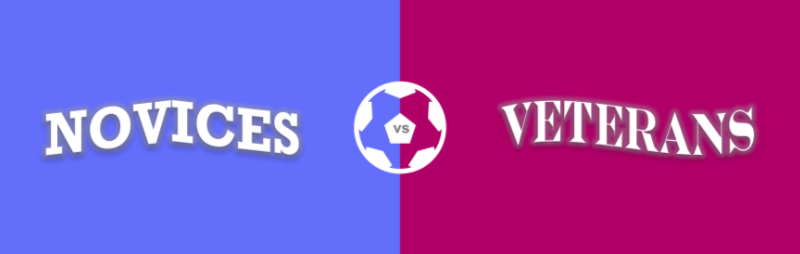

<a id="3.1."></a> <br>
## <div class="subsection_title">3.1. The distribution of programming experience is positively skewed.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div>

In [ ]:
# Q6: Percentage distribution of data scientists by programming experience

fig = go.Figure(data=[go.Histogram(x=prex, histnorm='percent', marker_color="#778899")])

# x axis categories in order
categories = ["0 years", "< 1 years", "1-3 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"]
fig.update_xaxes(categoryorder="array", categoryarray=categories)

# Title and axis labels layout
title = "Fig.3.1.1 - Percentage Distribution of Data Scientists by Programming Experience"
fig.update_layout(
    title={
        'text': title,
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,
    xaxis=dict(
        title="Programming Experience",
        titlefont_size=font_medium,
        tickfont_size=font_small,
    ),    
    yaxis=dict(
        title="Percent",
        titlefont_size=font_medium,
        tickfont_size=font_small,
    ),
    height=plot_height, 
    width=plot_width,
)
    
# Annotation for "Novices"
fig.add_annotation(
        x="< 1 years",
        y=23,
        xref="x",
        yref="y",
        text="Novices",
        showarrow=True,
        font=dict(
            family="Arial",
            size=font_large,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#626EFA",
        ax=-20,
        ay=-40,
        bordercolor="#626EFA",
        borderwidth=0,
        borderpad=4,
        bgcolor="#626EFA",
        opacity=0.8
        )

# Annotation for "Veterans"
fig.add_annotation(
        x="20+ years",
        y=7.5,
        xref="x",
        yref="y",
        text="Veterans",
        showarrow=True,
        font=dict(
            family="Arial",
            size=font_large,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#B00068",
        ax=5,
        ay=-40,
        bordercolor="#B00068",
        borderwidth=0,
        borderpad=4,
        bgcolor="#B00068",
        opacity=0.8
        )

fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats("Q6")
stats = get_stats(data_novices, data_veterans, "Q6")
title_1 = "Response Statistics for Coding Experience (Q6):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.1.1.** <span style="font-weight:bold; color:#B00068">Veterans</span> make up a little more than %7 of the respondents, and the <span style="font-weight:bold; color:#626EFA">novices</span> are above 22%. That leaves us with the fact that <span style="font-weight:bold; color:#626EFA">novices</span> are about three times as many as the <span style="font-weight:bold; color:#B00068">veterans</span>(1).<br>
**3.1.2.** The distribution of programming experience is positively skewed. We have more of less coding-experienced kagglers and fewer more coding-experienced kagglers.<br>
**3.1.3.** More than half of the respondents have a programming experience of fewer than three years. As we will see later, this finding has to do with young age as more than half of all data scientists are between the ages of 22 and 34[2]. 

In [ ]:
# The Number of Data Scientists by the Selected Groups

x = ["Novices", "Veterans"]
y1 = len(df_novices)
y2 = len(df_veterans)
y = [y1, y2]

# Bar colors
colors = ['#626EFA',] * 2
colors[1] = '#B00068'

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
            textfont_size=font_small,
            marker_color=colors,
            width=0.3
        )])

# Title and axis labels layout
fig.update_layout(
    title={
        'text': "Fig.3.1.2 - The Number of Data Scientists by the Selected Groups",
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,
    xaxis=dict(
        title="Programming Experience",
        titlefont_size=font_medium,
        tickfont_size=font_small,
    ),    
    yaxis=dict(
        title="# of Responses",
        titlefont_size=font_medium,
        tickfont_size=font_small,
    ),
    height=plot_height, 
    width=plot_width
)

fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats("Q6")
stats = get_stats(data_novices, data_veterans, "Q6")
title_1 = "Response Statistics for Coding Experience (Q6):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

nov_scores["Programming Experience"] = 5.0 # PRX
vet_scores["Programming Experience"] = 100.0

**3.1.4.** More precisely, the <span style="font-weight:bold; color:#626EFA">novices</span> are 5881 in number while the <span style="font-weight:bold; color:#B00068">veterans</span> are only 1860. In total, they are 7741 people.

<a id="3.2."></a> <br> 
## <div class="subsection_title">3.2. Africa and Asia lead in launching novices.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q3: In which country do you currently reside?</div>

In [ ]:
# Create a new dataframe for countries
df_countries = data[["Q6", "Q3"]]

# Calculate the number of novices and veterans in each country
df_countries["Size"] = 1
df_countries = df_countries.groupby(["Q6", "Q3"]).sum().reset_index()
df_countries = df_countries[(df_countries['Q6'] == "< 1 years") | (df_countries['Q6'] == "20+ years")]
df_countries = df_countries.rename(columns={"Q6": "Programming Experience"})

# Replace values
df_countries["Programming Experience"].replace({"< 1 years": "Novices"}, inplace=True)
df_countries["Programming Experience"].replace({"20+ years": "Veterans"}, inplace=True)

# Plot the graph
fig = px.scatter_geo(
    df_countries, locations="Q3", locationmode='country names', 
    color="Programming Experience", 
    size='Size', hover_name="Programming Experience", 
    projection="natural earth",
    title="Geographical Distribution of the Data Scientists with Different Years of Programming Experience", 
    color_discrete_map = {"Novices": "#626EFA", "Veterans": "#B00068"}
    )

# Title and axis labels layout
fig.update_layout(
    title={
        'text': "Fig.3.2.1 - Geographical Distribution of the Novices and Veterans",
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,
    height=plot_height,
    width=plot_width,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=0.35,
        xanchor="right",
        x=0.28,
        font=dict(
            size=font_small
        )
    )
)

del df_countries

fig.show()

**3.2.1.** <span style="font-weight:bold; color:#626EFA">Novices</span> mostly appear in less developed regions in the world.<br>
**3.2.2.** The reddish spot in the <i>United States</i> denotes the concentration of <span style="font-weight:bold; color:#B00068">veterans</span> in this country.<br>
**3.2.3.** Reddish spots where the <span style="font-weight:bold; color:#B00068">veteran</span> population is relatively more prominent emerge in developed regions.<br>
**3.2.4.** Where the IT revolution has begun and spread first, there exist proportionally more <span style="font-weight:bold; color:#B00068">veterans</span>.<br>
**3.2.5.** <i>India</i> seems to be the largest producer of coders.<br>

In [ ]:
# Import data
countries_by_continent = pd.read_csv("../input/countries-by-continent/Countries by continents.csv")
world_population = pd.read_excel("../input/world-population-by-country-2020/World population by country 2020.xlsx", sheet_name='Sheet1')
df_geog = data[["Q6", "Q3"]]
                
# Rename column
df_geog = df_geog.rename(columns={"Q3": "Country", "Q6": "Programming Experience"})

# Remove rows that are not specified
df_geog = df_geog.apply(lambda x: x.str.strip())
to_drop = ["I do not wish to disclose my location", "Other"]
df_geog = df_geog[~df_geog['Country'].isin(to_drop)]

# Get the continent with merge
df_geog = df_geog.merge(countries_by_continent[["Country", "Continent"]], on='Country', how='left')
# df_geog["Continent"] = df_geog["Q3"].apply(find_continent)

# Rename column values
old_prex_names = ["< 1 years", "20+ years"]
new_prex_names = ["Novices", "Veterans"]
df_geog['Programming Experience'] = df_geog['Programming Experience'].replace(old_prex_names, new_prex_names)

# Filter, group by and sum data scientists
df_geog["# of Data Scientists"] = 1
df_geog = df_geog[(df_geog["Programming Experience"]=="Novices") | (df_geog["Programming Experience"]=="Veterans")]
df_geog = df_geog.groupby(["Programming Experience", "Country", "Continent"]).sum().reset_index()

# Get the population with merge
df_geog = df_geog.merge(world_population[["Country", "Population"]], on='Country', how='left')
                
# Find the # of data scientists per 10_000,000 persons of the population
df_geog["# per 10M"] =  round((df_geog["# of Data Scientists"] * 10_000_000) / df_geog["Population"], 1)

# Plot treemap
fig = px.treemap(df_geog, path=[px.Constant("world"), 'Continent', 'Country', "Programming Experience"], 
                 values='# per 10M', maxdepth=-1, names="Programming Experience", 
                 color='# per 10M', hover_data=['Continent'], 
                 color_continuous_scale='RdBu_r')

# Title and axis labels layout
fig.update_layout(
    title={
        'text': "Fig.3.2.2 - Geographical Distribution of the Novices and Veterans by <br> Their Sizes per 10M People of the Country Population",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,
    height=plot_height, 
    width=plot_width,
    margin = dict(t=50, l=25, r=25, b=25),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="right",
        x=1,
        font=dict(
            size=font_small
        )
    )
)

del df_geog

fig.show()

<p>When we look at the <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> kaggler populations relative to the overall population in a particular country [3][4], we see a different picture. I have found the total number of <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> kagglers per 10 million people in each related country(2). The total programmers in Figures <b>3.2.1</b> and <b>3.2.2</b> represent only <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> totals.</p>

**3.2.6.** As far as <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> population concentration is concerned, looking at the geographical distribution above, it is possible to divide the kagglers world into six segments: <i>advanced laggards</i>, <i>balanced majors</i>, <i>lagging majors</i>, <i>leading majors</i>, <i>emergents</i>, and <i>developing laggards</i>.<br>
<i>Advanced laggards</i> are advanced countries that have the lowest <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> population ratios (i.e., the number of <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span> per 10 million of country population).<br>
<i>Balanced majors</i> are the countries that have relatively large and highly balanced <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> population ratios.<br>
<i>Lagging majors</i> are countries with a relatively high ratio of programmers, most of which are <span style="font-weight:bold; color:#B00068">veterans</span>.<br>
<i>Leading majors</i> are those countries with a relatively high ratio of programmers, most of which are <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
<i>Emergents</i> are developing countries that have a low programmer population ratio but an increasing portion of <span style="font-weight:bold; color:#626EFA">novices</span>.<br> 
<i>Developing laggards</i> are developing countries that have the lowest <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> population ratios.<br> 
**3.2.7.** In Europe, highly advanced countries such as <i>Germany</i>, <i>Italy</i>, <i>France</i>, <i>Austria</i> and a less advanced <i>Poland</i> do not stand out in the <span style="font-weight:bold; color:#778899">selected groups'</span> population. They lack both the experience of <span style="font-weight:bold; color:#B00068">veterans</span> and the potential of <span style="font-weight:bold; color:#626EFA">novices</span>. These countries are <i>advanced laggards</i>.<br>
**3.2.8.** According to my taxonomy, <i>advanced laggards</i> are currently located in Europe only.<br>
**3.2.9.** <i>Israel</i> has many programmers and a highly balanced distribution of <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span> with 22.8 and 21.7, respectively. <i>Israel</i> is a typical <i>balanced major</i>. <i>Portugal</i>, <i>United Kingdom</i>, <i>Denmark</i>, and <i>Canada</i> are the other <i>balanced major countries</i>. The last four countries have almost equally sized groups and total programmers between 24-30 per 10 million.<br> 
**3.2.10.** Lagging majors are <i>Norway</i>, <i>Spain</i>, <i>Switzerland</i>, <i>Netherlands</i>, <i>Sweden</i>, <i>Belgium</i>, <i>Australia</i>, and the <i>United States</i>. These are the major players, thanks to their veterans. <i>Australia</i> has a score of 39.3, yet most of which comes from <span style="font-weight:bold; color:#B00068">veterans</span>. Later in the future, they might become <i>advanced laggards</i> except <i>Spain</i>.<br>
**3.2.11.** Among the European lagging majors, <i>Spain</i> is the most populated country with around 47 million[3]. Populations of the other European lagging majors stay below 20 million. At the same time, <i>Spain</i> is the second largest after <i>Norway</i> in terms of programmer population ratio in its league. That leaves <i>Spain</i> with the highest number of <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span>  among the lagging majors in Europe. In June 2021, Amazon Web Services declared they would build data centers in <i>Spain</i>, investing 2.5 billion euros. The investment will benefit from the existing programmers and contribute to their growth in the future as well[5].<br>
**3.2.12.** <i>Singapore</i>, as a great <i>leading major</i>, stands out by 58 <span style="font-weight:bold; color:#626EFA">novices</span> per 10 million. <i>Singapore</i> also has the largest <span style="font-weight:bold; color:#626EFA">novice</span> and <span style="font-weight:bold; color:#B00068">veteran</span> population ratio.<br>
**3.2.13.** Other countries that contribute to Asia's performance in <span style="font-weight:bold; color:#626EFA">novices</span> launching as <i>leading majors</i> are <i>Taiwan</i>, <i>Hong Kong</i>, <i>United Arab Emirates</i>, <i>Japan</i>, <i>South Korea</i>, <i>India</i>, and <i>Russia</i> at descending order.<br>
**3.2.14.** <i>India</i>, which has the highest number of <span style="font-weight:bold; color:#626EFA">novices</span>, falls back in relative size calculation due to its large citizen population. <i>India</i> has 16.2 <span style="font-weight:bold; color:#626EFA">novices</span> per 10 million people.<br>
**3.2.15.** The only EU countries that made a jump in <span style="font-weight:bold; color:#626EFA">novices</span> production are <i>Ireland</i> and <i>Greece</i> with 26 and 16.8, respectively. They are, together with <i>Belarus</i>, the only <i>leading majors</i> in Europe.<br>
**3.2.16.** African <i>emergents</i>, <i>Kenya</i>, <i>Egypt</i>, and <i>Nigeria</i> receive their strength from their exploding <span style="font-weight:bold; color:#626EFA">novices</span> growth with 16, 13.7, and 11.7, respectively. Other <i>emergents</i> are <i>Argentina</i> and <i>Chile</i> in South America, <i>Malaysia</i> and <i>Sri Lanka</i> in Asia. <i>Emergents</i> might become <i>balanced majors</i> years later.<br>
**3.2.17.** <i>Developing laggards</i> are not advanced countries and have low population ratios of <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span>. Countries such as <i>Tunisia</i>, <i>South Africa</i>, <i>Uganda</i>, <i>Colombia</i>, <i>Ecuador</i>, <i>Peru</i>, <i>Mexico</i>, <i>Iran</i>, <i>Kazakhstan</i>, <i>Pakistan</i>, <i>Nepal</i>, <i>Saudi Arabia</i>, <i>Romania</i>, <i>Turkey</i>, <i>Ukraine</i> are <i>developing laggards</i>. These countries seem to lack a sufficient number of programmers relative to their overall populations. <i>Developing laggards</i> has a drawback that differentiates them from <i>advanced laggards</i>. The former has less capacity than the latter in attracting programmers from abroad. For example, <i>Germany</i> passed a law in August 2019 to attract and retain skilled workers[6], in particular, qualified IT specialists and engineers[7].

In [ ]:
# Distribution of Each Selected Group by Country of Residence
# Data scientists of < 1 years and 20+ years by country

target_column = "Q3"
value_type="absolute"
orientation = "h"
fig_title = "Fig.3.2.3 - Distribution of the Selected Groups by Country of Residence"
xaxis_title = "# of Responses"
yaxis_title = "Country of Residence"
categoryorder='total ascending'
value_type="absolute"
height=plot_height*4
width=plot_width
fig, _, _ = group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, height, width, value_type)

fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column)
stats = get_stats(data_novices, data_veterans, target_column)
title_1 = "Response Statistics for Country of Residence (Q3):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.2.17.** <span style="font-weight:bold; color:#B00068">Veterans</span> outnumber the <span style="font-weight:bold; color:#626EFA">novices</span> in countries such as the <i>United States</i>, <i>Australia</i>, <i>Norway</i>, <i>Spain</i>, <i>Switzerland</i>, <i>Netherlands</i>, and <i>Germany</i>.<br>
**3.2.18.** Out of these countries, the <i>United States</i> is worth mentioning as the one that experiences a dramatic difference between the <span style="font-weight:bold; color:#778899">selected groups</span>. In the <i>United States</i>, there are 457 <span style="font-weight:bold; color:#B00068">veterans</span>, while the <span style="font-weight:bold; color:#626EFA">novices</span> are 341. According to the Kaggle Survey 2021, the percentage of <i>United States</i> kaggler data scientists has steadily been decreasing since 2017[2]. These findings may indicate comparatively less interest in coding and data science among American residents considering people in Asian countries.<br>
**3.2.19.** Since the <i>United States</i> is the leader and high-performing in information technology with corporations like Amazon, Google, Microsoft, and others, they should meet the talent gap by hiring foreign specialists[8].

<a id="3.3."></a> <br> 
## <div class="subsection_title">3.3. The older the data scientist is, the more programming experience he has.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q1: What is your age (# years)?</div>

In [ ]:
# Correlation between Age and Programming Experience

# Create a new df
data_2 = data[["Q6", "Q1"]]

# Create a new column
data_2['cnt'] = 1

# Change the programming experience column type
data_2['Q6'] = data_2['Q6'].astype(cat_prex_rev_order)

# Histogram data
hist_data_q1 = data_2["Q1"].sort_values()
hist_data_q6 = data_2["Q6"].astype(cat_prex_order).sort_values()

# Group by programming experience and age
data_2 = data_2.groupby(["Q6", "Q1"]).agg({"cnt": sum})

# Turn into correlation matrix
data_2 = data_2.unstack()
data_2 = data_2["cnt"]

# Heatmap and marginal histograms
plt.style.use('seaborn-dark')
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(17.5,13.5), gridspec_kw={'height_ratios':[1.4,5], 'width_ratios':[1,5], 'wspace':0.1, 'hspace':0.1})
plt.suptitle("Fig.3.3.1 - Correlation between Age and Programming Experience", fontsize=font_large+font_margin, color=figure_title_color, ha="center", y=0.98)
this_ax = ax[0,0]
hide_axes(this_ax)

# Age histogram
this_ax = ax[0,1]
bins = np.arange(12) - 0.5
this_ax.hist(hist_data_q1, bins=bins, facecolor=figure_title_color, edgecolor = "white", linewidth=1.5, rwidth=0.4)
this_ax.xaxis.set_label_position("top")
this_ax.xaxis.tick_top()
this_ax.set_ylim([0, 5500])
this_ax.set_xlabel('Age', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)

# Programming experience histogram
this_ax = ax[1,0]
bins = np.arange(8) - 0.5
this_ax.hist(hist_data_q6, bins=bins, facecolor=subplot_title_color, edgecolor = "white", linewidth=1.5, orientation=u'horizontal', rwidth=0.4)
this_ax.set_yticklabels(["0", "0-1", "1-3", "3-5", "5-10", "10-20", "20+"])
this_ax.yaxis.set_label_position("left")
this_ax.xaxis.tick_top()
this_ax.xaxis.set_label_position("top")
this_ax.set_xlim([0, 8500])
this_ax.set_xlim(this_ax.get_xlim()[::-1])
this_ax.set_xlabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('Programming Experience (years)', fontsize=font_medium+font_margin, labelpad=10)

# Heatmap
heatplot_1 = sns.heatmap(data_2, cmap="Blues", linewidths=5, annot=True, fmt="d", square=False, xticklabels=True, yticklabels=True, cbar=False)
heatplot_1.set_xlabel("Age",fontsize=font_medium+font_margin, labelpad=10)
heatplot_1.set_ylabel("Programming Experience (years)",fontsize=font_medium+font_margin, labelpad=10)
heatplot_1.yaxis.set_label_position("right")
heatplot_1.set_yticklabels(["20+", "10-20", "5-10", "3-5", "1-3", "0-1", "0"])
heatplot_1.tick_params(axis='x', which='major', labelbottom = True, bottom=True, top = True, labeltop=False, pad=10)
heatplot_1.tick_params(axis='y', labelleft=False, labelright=True, labelrotation=0, pad=10)
 
# Regression line
this_ax = ax[1,1]

# Dataset
x = np.array([0.31, 0.57, 1.2, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
y = np.array([5.40, 5, 4, 3.60, 2.7, 2.0, 1.5, 1.2, 1.0, 0.9 ] )
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers over a specified interval.
X_ = np.linspace(x.min(), x.max(), 1000)
Y_ = X_Y_Spline(X_) 
this_ax.plot(X_, Y_, color=ln_color, linewidth=5, linestyle ="--", alpha=0.8) # #F57504

# Rectangles
this_ax = ax[1,1]
box_with_annot(0.1, 2.1, 3.8, 3.8, "A", box_color, this_ax, ec=box_color)
box_with_annot(0.2, 3.1, 2.7, 2.7, "B", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 0.1, 2.8, 0.8, "C", box_color, this_ax, ec=box_color)
box_with_annot(4.1, 3.1, 6.7, 2.8, "D", box_color, this_ax, ec=box_color)

plt.show()

del data_2

**3.3.1.** A positive correlation[9] between <i>age</i> and <i>programming experience</i> is not a surprising fact. The relationship between them follows a parabolic trend with a decreasing slope (dashed line). The respondents' coding time grows less than their age growth on average. In other words, increasing age doesn't add the same years to the <i>programming experience</i>. That means when people age, some of them just start programming, pause or stop programming, or intermittently code.<br>
**3.3.2.** Up to 25-29 years of age, we exactly see the same trend as depicted in the <i>programming experience</i> histogram on the left. The number of programmers, after peaking in 1-3 years of <i>coding experience</i>, starts gradually declining. However, at ages after 25-29, we see a slightly different trend. Their number first increases, then declines around 3-5 years of <i>coding experience</i>, and then starts climbing after that.<br>
**3.3.3.** Kagglers usually start participating in the programmer community until 35 years of age (<i>Rectangle A</i>).<br>
**3.3.4.** Kagglers who are younger than 30 and have up to 5 years of <i>coding experience</i> hold the majority of respondents (<i>Rectangle B</i>).<br>
**3.3.5.** The 2935 <span style="font-weight:bold; color:#626EFA">novices</span> (half of the body of the whole <span style="font-weight:bold; color:#626EFA">novices</span>) are younger than 24.<br>
**3.3.6.** Some unrealistic outliers exist unless we have child prodigies (<i>Rectangle C</i>).<br>
**3.3.7.** A decent number of kagglers either changed their careers to a coding-related work or have found a new area of interest for themselves (<i>Rectangle D</i>). As we see in the heatmap, we may have all reason to think that more kagglers than the <i>Rectangle D</i> represents must have chosen the coding later in their lives. However, how many they are is uncertain, so <i>Rectangle D</i> is a safe finding.<br>

<a id="3.4."></a> <br>
## <div class="subsection_title">3.4. Kagglers usually learn coding to do machine learning.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q15: For how many years have you used machine learning methods?</div>

In [ ]:
# Correlation between Machine Learning Experience and Programming Experience

# Create a new df
data_3 = data[["Q6", "Q15"]]

# Create and populate a new column
data_3['cnt'] = data_3['Q15'].apply(fill_nan)

# Fill nan values with 0
data_3['cnt'] = data_3['cnt'].fillna(0)

# Change dtype to int8
data_3['cnt'] = data_3['cnt'].astype("int")

# Change the programming and machine learning experience columns types
data_3['Q15'] = data_3['Q15'].astype(cat_mlex_order)
data_3['Q6'] = data_3['Q6'].astype(cat_prex_rev_order)

# Histogram data
hist_data_q15 = data_3["Q15"].sort_values()
hist_data_q15.dropna(inplace=True)
hist_data_q6 = data_3["Q6"].astype(cat_prex_order).sort_values()

# Group by programming experience and age
data_3 = data_3.groupby(["Q6", "Q15"]).agg({"cnt": sum})

# Turn into correlation matrix
data_3 = data_3.unstack()
data_3 = data_3["cnt"]

# Heatmap and marginal histograms
plt.style.use('seaborn-dark')
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(13.5,10.5), gridspec_kw={'height_ratios':[2,5], 'width_ratios':[1.2,5],'wspace':0.1, 'hspace':0.1}) # 10.8,8.4
plt.suptitle("Fig.3.4.1 - Correlation between Machine Learning Experience and Programming Experience", fontsize=font_large+font_margin, color=figure_title_color, ha="center", y=1.01)
this_ax = ax[0,0]
hide_axes(this_ax)

# Machine learning histogram
this_ax = ax[0,1]
bins = np.arange(10) - 0.5
this_ax.hist(hist_data_q15, bins=bins, facecolor=figure_title_color, edgecolor = "white", linewidth=1.5, rwidth=0.4)
this_ax.xaxis.tick_top()
this_ax.set_xticklabels(["0", "0-1", "1-2", "2-3", "3-4", "4-5", "5-10", "10-20", "20+"])
this_ax.tick_params(axis='x', labelrotation=0)
this_ax.xaxis.set_label_position("top")
this_ax.set_ylim([0, 10000])
this_ax.set_xlabel('Machine Learning Experience (years)', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)

# Programming experience histogram
this_ax = ax[1,0]
bins = np.arange(8) - 0.5
this_ax.hist(hist_data_q6, bins=bins, facecolor=subplot_title_color, edgecolor = "white", linewidth=1.5, orientation=u'horizontal', rwidth=0.5)
this_ax.set_yticklabels(["0", "0-1", "1-3", "3-5", "5-10", "10-20", "20+"])
this_ax.yaxis.set_label_position("left")
this_ax.xaxis.tick_top()
this_ax.xaxis.set_label_position("top")
this_ax.set_xlim([0, 8500])
this_ax.set_xlim(this_ax.get_xlim()[::-1])
this_ax.set_xlabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('Programming Experience (years)', fontsize=font_medium+font_margin, labelpad=10)

# Heatmap
heatplot_1 = sns.heatmap(data_3, cmap="Blues", linewidths=5, annot=True, fmt="d", square=False, xticklabels=True, yticklabels=True, cbar=False)
heatplot_1.set_xlabel("Machine Learning Experience (years)",fontsize=font_medium+font_margin, labelpad=10)
heatplot_1.set_ylabel("Programming Experience (years)",fontsize=font_medium+font_margin, labelpad=10)
heatplot_1.yaxis.set_label_position("right")
heatplot_1.set_yticklabels(["20+", "10-20", "5-10", "3-5", "1-3", "0-1", "0"])
heatplot_1.set_xticklabels(["0", "0-1", "1-2", "2-3", "3-4", "4-5", "5-10", "10-20", "20+"])
heatplot_1.tick_params(axis='x', which='major', labelrotation=0, labelbottom = True, bottom=True, top = True, labeltop=False, pad=10)
heatplot_1.tick_params(axis='y', labelleft=False, labelright=True, labelrotation=0, pad=10)

this_ax = ax[1,1]

# Line
x = list(range(3, 9))
y = list(range(6, 0, -1))
this_ax.plot(x, y, color=ln_color, linewidth=5, linestyle ="--", alpha=0.4)

# Rectangles
box_with_annot(1.1, 4.1, 2.8, 1.8, "A", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 0.1, 2.8, 0.8, "B", box_color, this_ax, ec=box_color)
box_with_annot(0.2, 0.2, 1.6, 6.6, "C", figure_title_color, this_ax, fill_value=True, fc=figure_title_color, alp=0.2)
box_with_annot(0.3, 5.1, 8.5, 1.7, "D", subplot_title_color, this_ax, fill_value=True, fc=subplot_title_color, alp=0.2)

plt.show()

del data_3

**3.4.1.** Kagglers usually learn <i>coding</i> to do <i>machine learning</i> (<i>Rectangle A</i>).<br>
**3.4.2.** 38.5% of veterans can be considered as <span style="font-weight:bold; color:#626EFA">novices</span> in <i>machine learning</i> (<i>Rectangle B</i>).<br>
**3.4.3.** Kagglers have gained experience in both <i>machine learning</i> and <i>programming</i> in parallel (<i>Above the line</i>).<br>
**3.4.4.** Similarly, not many people spend years in <i>machine learning</i> without spending time <i>coding</i> at the same time. (<i>Below the line</i>).<br> 
**3.4.5.** Kagglers who have one year or less of <i>machine learning</i> experience (13,052 respondents, <i>Rectangle C</i>) outnumber the people who have the same amount of experience in <i>programming</i> (5,498, <i>Rectangle D</i>). This picture is reversed for all other corresponding levels of experience. In other words, the number of kagglers who have certain years of experience in <i>programming</i> exceeds the number of kagglers who have the same amount of experience in <i>machine learning</i>. That means kagglers who already had <i>programming experience</i> later started <i>machine learning</i>.<br>
**3.4.6.** 3889 respondents who have some <i>programming experience</i> have no prior <i>machine learning experience</i>. Probably, these programmers joined the Kaggle community to give a start in <i>machine learning</i>.<br>
**3.4.7.** Unlike <b>3.4.6</b>, kagglers who have no <i>programming experience</i> also don't have any <i>machine learning experience</i>.<br>
**3.4.8.** Based on <b>3.4.6</b> and <b>3.4.7</b>, we can reach this conclusion: kagglers don't want and attempt to do <i>machine learning</i> without <i>coding experience</i>.<br>

<a id="3.5."></a> <br> 
## <div class="subsection_title">3.5. Women take more part in programming than in the past.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q2: What is your gender?</div>

In [ ]:
# Distribution of Each Selected Group by Gender

# Filter the df by programming experience and create new dataframes
y1_data = df_novices[["Q6", "Q2"]]
y20_data = df_veterans[["Q6", "Q2"]]

# Extablish x and y axes values
y = ['Novices', 'Veterans']
x_a_1 = y1_data[y1_data["Q2"]=="Man"]["Q2"].count()
x_a_20 = y20_data[y20_data["Q2"]=="Man"]["Q2"].count()

x_b_1 = y1_data[y1_data["Q2"]=="Woman"]["Q2"].count()
x_b_20 = y20_data[y20_data["Q2"]=="Woman"]["Q2"].count()

x_c_1 = y1_data[y1_data["Q2"]=="Prefer not to say"]["Q2"].count()
x_c_20 = y20_data[y20_data["Q2"]=="Prefer not to say"]["Q2"].count()

x_d_1 = y1_data[y1_data["Q2"]=="Nonbinary"]["Q2"].count()
x_d_20 = y20_data[y20_data["Q2"]=="Nonbinary"]["Q2"].count()

x_e_1 = y1_data[y1_data["Q2"]=="Prefer to self-describe"]["Q2"].count()
x_e_20 = y20_data[y20_data["Q2"]=="Prefer to self-describe"]["Q2"].count()

fig = go.Figure()
fig.add_trace(go.Bar(y=y, x=[x_a_1, x_a_20], name='Man', orientation='h', marker=dict(color=ln_color), width=0.5)) # "#A8B4FF"
fig.add_trace(go.Bar(y=y, x=[x_b_1, x_b_20], name='Woman', orientation='h', marker=dict(color=box_color), width=0.5)) # "#F9463C"
fig.add_trace(go.Bar(y=y, x=[x_c_1, x_c_20], name='Prefer not to say', orientation='h', marker=dict(color=subplot_title_color), width=0.5)) # "#0989D3"
fig.add_trace(go.Bar(y=y, x=[x_d_1, x_d_20], name='Nonbinary', orientation='h', marker=dict(color=figure_title_color), width=0.5)) # "#FFFF14"
fig.add_trace(go.Bar(y=y, x=[x_e_1, x_e_20], name='Prefer to self-describe', orientation='h', marker=dict(color="#00005A"), width=0.5)) # "#00AF13"

# Update layout
fig.update_layout(
    barmode='stack',
    title={
        'text': "Fig.3.5.1 - Distribution of the Selected Groups by Gender",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,
    xaxis=dict(
        title='# of Responses',
        titlefont_size=font_medium,
        tickfont_size=font_small,
        categoryorder='total descending'
    ),    
    yaxis=dict(
        title='Programming Experience',
        titlefont_size=font_medium,
        tickfont_size=font_small,
    ),
    height=plot_height,
    width=plot_width,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="right",
        x=1,
        font=dict(
            size=font_small
        )
    )
)

fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats("Q2")
stats = get_stats(data_novices, data_veterans, "Q2")
title_1 = "Response Statistics for Gender (Q2):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.5.1.** Out of <span style="font-weight:bold; color:#B00068">veterans</span>, 1665 are <i>men</i>, 143 are <i>women</i>. Out of <span style="font-weight:bold; color:#626EFA">novices</span>, 4366 are <i>men</i>, 1418 are <i>women</i>. Therefore, 24.5% of the <span style="font-weight:bold; color:#626EFA">novices</span> are <i>women</i>, while only 7.9% of the <span style="font-weight:bold; color:#B00068">veterans</span> are <i>women</i>. The Kaggle survey suggests, now, more <i>women</i> go into programming than 20 years ago.<br>

<a id="3.6."></a> <br>
## <div class="subsection_title">3.6. The highest level of formal education for the majority of novices is a bachelor's degree.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?</div>

In [ ]:
# QUESTION-4: Highest Level of Formal Education

target_column = "Q4"
orientation = "v"
fig_title = "Fig.3.6.1 - Highest Formal Education Attained or to be Attained in the Next Two Years"
xaxis_title = 'Formal Education Levels'
yaxis_title = "% of the Selected Groups' Responses"
categoryorder='total descending'
value_type="percentage"
x_order = ["No formal education past high school",
            "Some college/university study without earning a bachelor’s degree", 
            "Bachelor’s degree", 
            "Master’s degree",
            "Doctoral degree",
            "Professional doctorate",
            "I prefer not to answer"
          ]

axis_ticks = ["No formal education <br> past high school",
            "Some college/university <br> study without earning <br> a bachelor’s degree", 
            "Bachelor’s degree", 
            "Master’s degree",
            "Doctoral degree",
            "Professional <br> doctorate",
            "I prefer <br> not to answer"
             ]

success_factor = "Doctoral degree"
fig, novices_score, veterans_score = group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, plot_height, plot_width, value_type, x_order, axis_ticks, success_factor)
 
fig.update_xaxes(tickangle=30)
    
fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column)
stats = get_stats(data_novices, data_veterans, target_column)
title_1 = "Response Statistics for Formal Education (Q4):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

nov_scores["Formal Education"] = novices_score # FEL
vet_scores["Formal Education"] = veterans_score

**3.6.1.** According to the Kaggle survey[2], 47.7% of the respondents have a <i>master's degree</i> as the highest educational level, the largest group among the respondents. 42.3% of the <span style="font-weight:bold; color:#B00068">veterans</span> have <i>master's degrees</i>, and 47.4% of the <span style="font-weight:bold; color:#626EFA">novices</span> have <i>bachelor's degrees</i> as the highest level of formal education. As <b>3.3.5</b> suggests, the novices are young programmers, so they may not have come to a master study stage yet.<br>
**3.6.2.** The age difference between the <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span> seems to show its effect on the highest level of formal education. <span style="font-weight:bold; color:#B00068">Veterans</span> had more time to pursue further studies. 27.6% of them have <i>doctoral degrees</i> as the highest level of formal education, whereas the <span style="font-weight:bold; color:#626EFA">novices</span> who completed their <i>Ph.D.</i> hold only 4.1%.<br>
**3.6.3.** Kaggle survey results[2] reveal that 15% of the respondents have <i>doctoral degrees</i>, and 1.4% have <i>professional doctorates</i>. 27.6% and 3.3% of the <span style="font-weight:bold; color:#B00068">veterans</span> have these degrees, respectively. Therefore, <span style="font-weight:bold; color:#B00068">veterans</span> are way above the average same education level.<br>
**3.6.4.** On the other hand, 4.1% of the <span style="font-weight:bold; color:#626EFA">novices</span> have <i>doctoral degrees</i>, 1% have <i>professional doctorates</i>. Thus, <span style="font-weight:bold; color:#626EFA">novices</span> are well below the average of the same educational level. This situation may stem from age.<br>
**3.6.5.** However, it would be premature to judge that age is a strong indicator of formal education. Other non-veteran and non-novice kagglers still had time to pursue a doctoral study as <span style="font-weight:bold; color:#B00068">veterans</span> but didn't do so, otherwise, general averages would not have stayed well below the <span style="font-weight:bold; color:#B00068">veterans</span>' highest educational norm (See <b> 3.6.3</b>).<br>
**3.6.6.** According to the Kaggle survey[2], <i>doctoral degrees</i> attained are decreasing straight from 2017 on. The same pattern occurs with the <i>master's degrees</i> from 2018. It is still too early to declare that the role of formal education in data science is falling among kagglers. Though, as we will see later, non-formal education platforms are popular to learn data science. In total, we could feel that as data science grows more popular and more people join the Kaggle community, the highest formal education can be shown percentage-wise to regress to lower academic levels. In addition, the proliferation and practicality of online courses facilitate filling the education gap.<br>

<a id="3.7."></a> <br>
## <div class="subsection_title">3.7. Veterans are generally on the production front.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q5: Select the title most similar to your current role.</div>

In [ ]:
# QUESTION-5: The Title Most Similar to the Current Role of the Selected Groups' Members

target_column = "Q5"
orientation = "v"
fig_title = "Fig.3.7.1 - The Title Most Similar to the Current Role"
xaxis_title = 'Titles'
yaxis_title = "# of the Selected Groups' Responses"
categoryorder='total descending'
value_type="absolute"

fig, novices_score, veterans_score = group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, plot_height, plot_width, value_type)

fig.update_xaxes(tickangle=30)

fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column)
stats = get_stats(data_novices, data_veterans, target_column)
title_1 = "Response Statistics for the Current Role Title (Q5):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.7.1.** As <b>3.3.5</b> and <b>3.6</b> suggest, the <span style="font-weight:bold; color:#626EFA">novices</span>, as young programmers, are still <i>studying</i> (37.5%) or <i>searching for a job</i> (12.7%).<br>
**3.7.2.** As expected from a <span style="font-weight:bold; color:#B00068">veteran</span> coder, <span style="font-weight:bold; color:#B00068">veterans</span> are mostly <i>Software Engineers</i> (368 respondents).<br> 
**3.7.3.** Thanks to their experience, <span style="font-weight:bold; color:#B00068">veterans</span> also have heavy-weight roles such as <i>Research Scientist</i> or <i>Program/Project Manager</i>.<br>
**3.7.4.** Only 23 <span style="font-weight:bold; color:#B00068">veterans</span> are <i>Students</i>, and 87 <span style="font-weight:bold; color:#B00068">veterans</span> are <i>Unemployed</i>. Thus, safe to say, the <span style="font-weight:bold; color:#B00068">veterans</span> are generally on the production front.<br>

<a id="3.8."></a> <br> 
## <div class="subsection_title">3.8. Veterans are versatile programmers.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q7: What programming languages do you use on a regular basis?</div>

In [ ]:
# QUESTION-7: Programming Languages Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "7"
options = 12
other = "yes"

# List the new names of columns
new_columns = ["Python", "R", "SQL", "C", "C++", "Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_of_prog_lang"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")

q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Programming <br> Languages Used", "Current Usage of the Programming Languages")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Programming Languages"]
yaxis_titles = ["# of the Programming Languages", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.8.1 - Programming Languages Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Programming Languages Used (Q7):"
create_score_df(stats, title_1)

# Get scores
nov_scores["Programming Languages"] = stats["Novices True %"][0] # PRL
vet_scores["Programming Languages"] = stats["Veterans True %"][0]

**3.8.1.** When we look at the percentage distribution(3) of the <span style="font-weight:bold; color:#778899">selected groups</span> among the programming languages, we see that <span style="font-weight:bold; color:#B00068">veterans</span> are way ahead of the <span style="font-weight:bold; color:#626EFA">novices</span> in all languages except <i>Python</i>. Many years of experience must have allowed them to learn several programming languages. On average (median), the <span style="font-weight:bold; color:#B00068">veterans</span> know three, the <span style="font-weight:bold; color:#626EFA">novices</span> know two programming languages.<br>
**3.8.2.** Only in <i>Python</i>, the <span style="font-weight:bold; color:#626EFA">novices</span> surpass the <span style="font-weight:bold; color:#B00068">veterans</span> by a small margin. Easiness and the growing popularity of <i>Python</i>[10] should be an ideal starting point for those who are new to programming and data science.<br>
**3.8.3.** <span style="font-weight:bold; color:#B00068">Veterans</span> by far excel in languages such as <i>SQL</i>, <i>Javascript</i>, and <i>Bash</i> compared to the <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**3.8.4.** In knowing <i>Other</i> languages, the comparative state of 28.8% of the <span style="font-weight:bold; color:#B00068">veterans</span> versus 4% of the <span style="font-weight:bold; color:#626EFA">novices</span> <u>further confirms</u> the programming skill versatility of the <span style="font-weight:bold; color:#B00068">veterans</span>.<br>
**3.8.5.** 97% of <span style="font-weight:bold; color:#626EFA">novices</span> and 99% of <span style="font-weight:bold; color:#B00068">veterans</span> stated that they use at least one of the languages asked. Yet, the difference between the median numbers of the languages each group knows is only one. Because <span style="font-weight:bold; color:#B00068">veterans</span> have 20 more years of programming experience than <span style="font-weight:bold; color:#626EFA">novices</span>, their proficiency levels across the same languages should not be close.<br>

<a id="3.9."></a> <br>
## <div class="subsection_title">3.9. Selected groups agree on Python as the recommended language to learn first for data science.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q8: What programming language would you recommend an aspiring data scientist to learn first?</div>

In [ ]:
# QUESTION-8: Programming Languages Recommended by the Selected Groups to Learn First for Data Science

target_column = "Q8"
orientation = "v"
fig_title = "Fig.3.9.1 - Programming Languages Recommended to Learn First for Data Science"
xaxis_title = 'Programming Languages'
yaxis_title = "% of the Selected Groups' Responses"
categoryorder='total descending'
value_type="percentage"

fig, _, _ = group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, plot_height, plot_width, value_type)
        
fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column)
stats = get_stats(data_novices, data_veterans, target_column)
title_1 = "Response Statistics for the Recommended Programming Languages (Q8):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.9.1.** There is almost unanimity over <i>Python</i> as the recommended language. No matter how many different programming languages <span style="font-weight:bold; color:#778899">selected groups</span> use and how well they master them, they agree on <i>Python</i> as the recommended language to learn first for data science. This question also leaves out a <u>proven answer</u> for the second most important language to learn given that <i>SQL</i> and <i>R</i> are head-to-head as in the above graph.<br>
**3.9.2.** In general, we can say <i>Python</i>, <i>SQL</i>, and <i>R</i> are good to learn for data science.<br>

<a id="3.10."></a> <br>
## <div class="subsection_title">3.10. Veterans use both older and new editors.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q9: Which of the following integrated development environments (IDE's) do you use on a regular basis?</div>

In [ ]:
# QUESTION-9: Integrated Development Environments (IDEs) Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "9"
options = 12
other = "yes"

# List the new names of columns
new_columns = ["JupyterLab", "RStudio", "Visual Studio", "VSCode", "PyCharm", "Spyder", 
               "Notepad++", "Sublime Text", "Vim, Emacs, <br> or similar", "MATLAB", "Jupyter Notebook", "None", "Other"]
              

# Add a new column and sum the number of new column
new_col_name = "No_of_ide"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> IDEs Used", "Current Usage of the Integrated <br> Development Environments")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Integrated Development Environments"]
yaxis_titles = ["# of the Integrated Development Environments Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.10.1 - Integrated Development Environments Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the IDEs Used (Q9):"
create_score_df(stats, title_1)

# Get scores
nov_scores["IDEs"] = stats["Novices True %"][0] # IDE
vet_scores["IDEs"] = stats["Veterans True %"][0]

To interpret this graph in a more meaningful way, we need a piece of background information like the dates of release of the included IDEs. The major ones that are necessary for our analysis have the release dates as specified below:<br>

| IDE Name                | Date of Release       |
| :---------------------- |:--------------------  |
| JupyterLab[11]          | February 20, 2018     |
| Visual Studio Code[12]  | April 29, 2015        |
| Jupyter Notebook[13]    | February 2015         |
| PyCharm: [14]           | February 3, 2010      |
| Notepad++[15]           | November 24, 2003     |
| Visual Studio[16]       | 1997                  |
| Vim[17]                 | November 2, 1991      |
| Emacs[18]               | 1976                  |

**3.10.1.** When compared to the <span style="font-weight:bold; color:#626EFA">novices</span>,  the <span style="font-weight:bold; color:#B00068">veterans</span>, by a fair margin, use <i>Visual Studio</i>, <i>Notepad++</i>, <i>Vim</i>, and <i>Emacs</i> because these are older editors, which can even date back to 1976. It seems that people do not give up their old habits and continue to use these editors.<br>
**3.10.2.** However, the <span style="font-weight:bold; color:#B00068">veterans</span> also keep up with the new IDEs and use them almost as much as or sometimes more than the <span style="font-weight:bold; color:#626EFA">novices</span> use, as we see in <i>JupyterLab</i>, <i>Visual Studio Code</i>, <i>Jupyter Notebook</i>, and <i>PyCharm</i>. This conclusion proves the <span style="font-weight:bold; color:#B00068">veterans</span>' IDE versatility, which is further confirmed by the following finding.<br>
**3.10.3.** The median number of IDEs used by the <span style="font-weight:bold; color:#B00068">veterans</span> is three, while it is two for the <span style="font-weight:bold; color:#626EFA">novices</span>. That is not surprising of programmers who have 20 years or more experience.<br>
**3.10.4.** The <span style="font-weight:bold; color:#626EFA">novices</span> generally turn to relatively newly released IDEs such as <i>Jupyter Notebook</i>, <i>Visual Studio Code</i>, <i>PyCharm</i>, and <i>JupyterLab</i>.<br>
**3.10.5.** Both <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span> use <i>R Studio</i> to write in R. But, almost 2-3% of each group prefer another editor to use R programming language as <b>Figure 3.8.1</b> and <b>Figure 3.10.1</b> together suggest. In <b>Figure 3.10.1</b>, the percentage usage of R Studio by the <span style="font-weight:bold; color:#778899">selected groups</span> is nearly 2-3% less for each than the percentage usage of R programming language by both <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span> as depicted in <b>Figure 3.8.1</b>.<br>

In [ ]:
# Correlation between
# QUESTION-7: Programming Languages Used by the Selected Groups
# QUESTION-9: Integrated Development Environments (IDEs) Used by the Selected Groups

# New column names
new_cls_a_1 = ["Python", "R", "SQL", "C", "C++", "Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "PRL_None", "PRL_Other"]

new_cls_a_2 = ["JupyterLab", "RStudio", "Visual Studio", "VSCode", "PyCharm", "Spyder", 
               "Notepad++", "Sublime Text", "Vim, Emacs,\nor similar", "MATLAB", "Jupyter\nNotebook", "IDE_None", "IDE_Other"]
x_label = "Integrated Development Environments"
y_label = "Programming Languages"

# Create two dataframes for novices and veterans
df_a_1, df_a_20 = create_df(["Q7", "Q9"], new_cls_a_1, new_cls_a_2)

y_loc = 1.10
heatmap_title_a = "Fig.3.10.2.a - Programming Languages vs. Integrated Development Environments for Novices"
plot_heatmap(df_a_1, heatmap_title_a, cmap1, subplot_title_color, x_label, y_label, y_loc)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)

heatmap_title_a = "Fig.3.10.2.b - Programming Languages vs. Integrated Development Environments for Veterans"
plot_heatmap(df_a_20, heatmap_title_a, cmap2, figure_title_color, x_label, y_label, y_loc)

**3.10.6.** In the above graph, we need to focus on the darkest cells, which happen to be above 0.3. <span style="font-weight:bold; color:#778899">Selected groups</span> generally use <i>R</i> with <i>R Studio</i> and <i>Python</i> with <i>Jupyter Notebook</i>.<br>
**3.10.7.** <span style="font-weight:bold; color:#B00068">Veterans</span> also use <i>Bash</i> in <i>Vim</i> or <i>Emacs</i>.<br>

<a id="3.11."></a> <br>
## <div class="subsection_title">3.11. Veterans win in visualization libraries too.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q14: What data visualization libraries or tools do you use on a regular basis?</div>

In [ ]:
# QUESTION-14: Visualization Libraries Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "14"
options = 11
other = "yes"

# List the new names of columns
new_columns = ["Matplotlib", "Seaborn", "Plotly / <br> Plotly Express", "Ggplot / ggplot2", "Shiny",
               "D3js", "Altair", "Bokeh", "Geoplotlib", "Leaflet / Folium", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_of_vis_libs"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Visualization <br> Libraries Used", "Current Usage of the Visualization Libraries")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Visualization Libraries"]
yaxis_titles = ["# of the Visualization Libraries Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.11.1 - Visualization Libraries Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Visualization Libraries Used (Q14):"
create_score_df(stats, title_1)

# Get scores
nov_scores["Visualization Libraries"] = stats["Novices True %"][0] # VSL
vet_scores["Visualization Libraries"] = stats["Veterans True %"][0]

**3.11.1.** <i>Matplotlib</i> and <i>Seaborn</i> are the most preferred visualization libraries by both groups.<br>
**3.11.2.** A higher percentage of <span style="font-weight:bold; color:#B00068">veterans</span> use each visualization library than <span style="font-weight:bold; color:#626EFA">novices</span> though these libraries are not very old, that is, created after 2003[19].<br>
**3.11.3.** <span style="font-weight:bold; color:#626EFA">Novices</span> use <i>Matplotlib</i> and <i>Seaborn</i> slightly less than the <span style="font-weight:bold; color:#B00068">veterans</span>, as the <span style="font-weight:bold; color:#626EFA">novices</span> usually learn these packages first when they start the machine learning journey.<br>
**3.11.4.** 9.2% of the <span style="font-weight:bold; color:#B00068">veterans</span> use <i>D3.js</i>, while only 1.3% of the <span style="font-weight:bold; color:#626EFA">novices</span> use it. This difference can be explained by the fact that the <span style="font-weight:bold; color:#B00068">veterans</span>, as <b>3.8.3</b> suggests, use <i>JavaScript</i> much more than the <span style="font-weight:bold; color:#626EFA">novices</span> (29% versus 8%), and <i>D3.js</i> is a JavaScript library[20].<br>
**3.11.5.** 24.6 % of the <span style="font-weight:bold; color:#B00068">veterans</span> use <i>Ggplot</i>, and 9% of them use <i>Shiny</i>. These percentages are 15% and 2.4% for the <span style="font-weight:bold; color:#626EFA">novices</span>, respectively. As seen in <b>Figure 3.8</b>, 27.3% of the <span style="font-weight:bold; color:#B00068">veterans</span> use R, while 18.9% of the <span style="font-weight:bold; color:#626EFA">novices</span> use this programming language. This finding might explain the preference of the <span style="font-weight:bold; color:#778899">selected groups</span> for <i>Ggplot</i> and <i>Shiny</i>.<br>
**3.11.6.** According to the Response Statistics, on average, 84% of the <span style="font-weight:bold; color:#B00068">veterans</span> (<i>Veterans True %</i>) use visualization libraries, whereas 73% of the <span style="font-weight:bold; color:#626EFA">novices</span> (<i>Novices True %</i>) use them on a regular basis.

<a id="3.12."></a> <br> 
## <div class="subsection_title">3.12. Veterans' expertise level is even higher for machine learning frameworks than the novices.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q16: Which of the following machine learning frameworks do you use on a regular basis?</div>

In [ ]:
# QUESTION-16: Machine Learning Frameworks Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "16"
options = 17
other = "yes"

# List the new names of columns
new_columns = ["Scikit-learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet", "Xgboost", "LightGBM", "CatBoost", 
               "Prophet", "H2O3", "Caret", "Tidymodels", "JAX", "PyTorch Lightning", "Huggingface", "None", "Other"
              ]

# Add a new column and sum the number of new column
new_col_name = "No_ML_frameworks"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> ML Frameworks <br> Used", "Current Usage of the Machine Learning Frameworks")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Machine Learning Frameworks"]
yaxis_titles = ["# of the Machine Learning Frameworks Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.12.1 - Machine Learning Frameworks Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Machine Learning Frameworks Used (Q16):"
create_score_df(stats, title_1)

# Get scores
nov_scores["ML Frameworks"] = stats["Novices True %"][0] # MLF
vet_scores["ML Frameworks"] = stats["Veterans True %"][0]

**3.12.1.** As for machine learning frameworks, the difference between the user percentages of the <span style="font-weight:bold; color:#B00068">veterans</span> and the <span style="font-weight:bold; color:#626EFA">novices</span> is higher than for any other skill mentioned before. The median number of frameworks used by the <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span> are 3 and 1, respectively. Only after programming languages and EDA visualization libraries, one learn machine learning frameworks. Therefore, we might think that <span style="font-weight:bold; color:#626EFA">novices</span>' penetration rate for these frameworks will be lower than for the programming languages and visualization libraries.<br>
**3.12.2.** Python as a programming language, Jupyter Notebook as an IDE,  Matplotlib as a visualization library, and <i>Scikit-learn</i> as a machine learning framework are the most used tools by <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span>. Usage percentages for the <span style="font-weight:bold; color:#626EFA">novices</span> are 86%, 62.1%, 61.7%, and 39.6, respectively. The same rates for <span style="font-weight:bold; color:#B00068">veterans</span> are 81.7%, 59.6%, 66.1%, and 59.4%, respectively. These are the statistics we have learned from the previous figures. One can see that in the first three tools, <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span> are close percentage-wise, but in the machine learning framework, <span style="font-weight:bold; color:#626EFA">novices</span>' percentage shrinks much more considerably than the <span style="font-weight:bold; color:#B00068">veterans</span>. As suggested in <b>3.12.1</b>, <span style="font-weight:bold; color:#626EFA">novices</span>, as the least experienced programmers, have not come to the phase of fully utilizing the existing machine learning frameworks.<br>
**3.12.3.** On average, 79% of the <span style="font-weight:bold; color:#B00068">veterans</span> use machine learning frameworks, whereas 52% of the <span style="font-weight:bold; color:#626EFA">novices</span> use them.<br>
**3.12.4.** <i>Scikit-learn</i>, <i>Tensorflow</i>, and <i>Keras</i> are the most used libraries in descending order by both <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**3.12.5.** 25% of the <span style="font-weight:bold; color:#B00068">veterans</span> use four or more frameworks regularly as the distribution graph exhibits. On the other hand, 25% of <span style="font-weight:bold; color:#626EFA">novices</span> use two or more frameworks. The maximum number of frameworks used by a <span style="font-weight:bold; color:#626EFA">novice</span> is five, while it is eight for a <span style="font-weight:bold; color:#B00068">veteran</span>.<br>

<a id="3.13."></a> <br>  
## <div class="subsection_title">3.13. Traditional methods are popular for both groups.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q17: Which of the following ML algorithms do you use on a regular basis?</div>

In [ ]:
# QUESTION-17: Machine Learning Algorithms Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "17"
options = 11
other = "yes"

# List the new names of columns
new_columns = ["Linear or Logistic <br> Regression", "Decision Trees or <br> Random Forests", "Gradient Boosting <br> Machines",
                "Bayesian <br> Approaches", "Evolutionary <br> Approaches", "Dense Neural <br> Networks", "Convolutional <br> Neural Networks",
                "Generative Adversarial <br> Networks", "Recurrent Neural <br> Networks", "Transformer <br> Networks", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_ML_algorithms"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> ML Algorithms <br> Used", "Current Usage of the Machine Learning Algorithms")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Machine Learning Algorithms"]
yaxis_titles = ["# of the Machine Learning Algorithms Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.13.1 - Machine Learning Algorithms Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=90)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Machine Learning Algorithms Used (Q17):"
create_score_df(stats, title_1)

# Get scores
nov_scores["ML Algorithms"] = stats["Novices True %"][0] # MLA
vet_scores["ML Algorithms"] = stats["Veterans True %"][0]

**3.13.1.** <b>Figure 3.13.1</b> conveys the same messages as <b>Figure 3.12.1</b> since they relate to the same subject. Their response statistics are very close, with 82% for the <span style="font-weight:bold; color:#B00068">veterans</span> and 53% for the <span style="font-weight:bold; color:#626EFA">novices</span>. Therefore, there is again a wide gap between the user percentage of <span style="font-weight:bold; color:#B00068">veterans</span> and the user percentage of <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**3.13.2.**  Median numbers of algorithms used are three for <span style="font-weight:bold; color:#B00068">veterans</span> and one for <span style="font-weight:bold; color:#626EFA">novices</span>. The maximum number of algorithms used by a <span style="font-weight:bold; color:#626EFA">novice</span> is five, while it is 11 for a <span style="font-weight:bold; color:#B00068">veteran</span>.<br>
**3.13.3.** The distribution of machine learning algorithms used by the <span style="font-weight:bold; color:#B00068">veterans</span> is considerably wide. 25% of the <span style="font-weight:bold; color:#B00068">veterans</span> use five or more algorithms regularly.<br>
**3.13.4.** Traditional methods such as <i>Linear or Logistic Regression</i>, <i>Decision Trees or Random Forests</i> come at the top for both groups. This finding also coincides with the popularity of Scikit-learn suggested by <b>3.12.4</b>.<br>
**3.13.5.** The percentage of <span style="font-weight:bold; color:#B00068">veterans</span> who use neural networks is almost three times more than the percentage of <span style="font-weight:bold; color:#626EFA">novices</span> who use these algorithms. Traditional methods don't have such a large spread.<br>

In [ ]:
# Correlation between
# QUESTION-16: Machine Learning Frameworks Used by the Selected Groups
# QUESTION-17: Machine Learning Algorithms Used by the Selected Groups

# New column names
new_cls_b_1 = ["Scikit-learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet", "Xgboost", "LightGBM", "CatBoost", 
               "Prophet", "H2O3", "Caret", "Tidymodels", "JAX", "PyTorch Lightning", "Huggingface", "MLF_None", "MLF_Other"]

new_cls_b_2 = ["Linear or Logistic\nRegression", "Decision Trees or\nRandom Forests", "Gradient Boosting\nMachines",
                "Bayesian\nApproaches", "Evolutionary\nApproaches", "Dense Neural\nNetworks", "Convolutional\nNeural Networks",
                "Generative\nAdversarial Networks", "Recurrent\nNeural Networks", "Transformer\nNetworks", "MLA_None", "MLA_Other"]

x_label = "Machine Learning Algorithms"
y_label = "Machine Learning Frameworks"

# Create two dataframes for novices and veterans
df_b_1, df_b_20 = create_df(["Q16", "Q17"], new_cls_b_1, new_cls_b_2)

y_loc = 1.16
heatmap_title_b = "Fig.3.13.2.a - Machine Learning Frameworks vs. Machine Learning Algorithms for Novices"
plot_heatmap(df_b_1, heatmap_title_b, cmap1, subplot_title_color, x_label, y_label, y_loc)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)

heatmap_title_b = "Fig.3.13.2.b - Machine Learning Frameworks vs. Machine Learning Algorithms for Veterans"
plot_heatmap(df_b_20, heatmap_title_b, cmap2, figure_title_color, x_label, y_label, y_loc)

**3.13.6.** In the above graph, we need to focus on the darkest cells, which happen to be above 0.3. <span style="font-weight:bold; color:#778899">Selected groups</span> use <i>Scikit-learn</i> for <i>linear regression</i>, <i>logistic regression</i>, <i>decision trees</i>, <i>random forests</i>, and <i>gradient boosting machines</i>.<br>
**3.13.7.** They use <i>XGBoost</i> for classification problems.<br>
**3.13.8.** They also use <i>XGBoost</i> and <i>LightGBM</i> for <i>gradient boosting machine algorithms</i> naturally.<br>
**3.13.9.** <span style="font-weight:bold; color:#778899">Selected groups</span> run <i>Convolutional Neural Networks</i> and <i>Recurrent Neural Networks</i> on <i>Tensorflow</i> and <i>Keras</i>.<br>
**3.13.10.** The above points were the common ones, and we see differences between both groups as well. <span style="font-weight:bold; color:#B00068">Veterans</span> use <i>Hugginface</i> for <i>Transformer Networks</i>, and <i>Pytorch</i> for <i>Convolutional Neural Networks</i>. On the other hand, <span style="font-weight:bold; color:#626EFA">novices</span> apply <i>Dense Neural Networks</i> on <i>Tensorflow</i> and <i>Keras</i>. All these points have been found according to the threshold (0.3) declared in <b>3.13.6</b>.<br>

<a id="3.14."></a> <br>  
## <div class="subsection_title">3.14. It seems too early for novices to use computer vision methods.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q18: Which categories of computer vision methods do you use on a regular basis?</div>

In [ ]:
# QUESTION-18: Computer Vision Methods Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "18"
options = 6
other = "yes"

# List the new names of columns
new_columns = ["General purpose image / <br> video tools", "Image segmentation <br> methods", "Object detection <br> methods",
                "Image classification", "Generative Networks", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_comp_vis_meth"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Computer Vision <br> Methods Used", "Current Usage of the Computer Vision Methods")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Computer Vision Methods"]
yaxis_titles = ["# of the Computer Vision Methods Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.14.1 - Computer Vision Methods Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Computer Vision Methods Used (Q18):"
create_score_df(stats, title_1)

# Get scores
nov_scores["Computer Vision"] = stats["Novices True %"][0] # CVM
vet_scores["Computer Vision"] = stats["Veterans True %"][0]

**3.14.1.** Computer vision methods are a more technical topic, and it is too early for <span style="font-weight:bold; color:#626EFA">novices</span> to let themselves in thoroughly yet. That's why here we see a more widening gap between user percentages of the <span style="font-weight:bold; color:#778899">selected groups</span>.<br>
**3.14.2.** The percentage of <span style="font-weight:bold; color:#B00068">veterans</span> who use computer vision methods is three times as much as the percentage of <span style="font-weight:bold; color:#626EFA">novices</span> who use these methods. Only 11% of the <span style="font-weight:bold; color:#626EFA">novices</span> answer this question positively, while 33% percent of the <span style="font-weight:bold; color:#B00068">veterans</span> respond they use the computer vision methods.<br> 
**3.14.3.** On average, only 15.9% of the respondents from both groups regularly use computer vision methods. So, these methods are not hot among the members of the <span style="font-weight:bold; color:#778899">selected groups</span>.<br>
**3.14.4.** Image classification is the most used method by both <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span>. <i>Image segmentation</i>, <i>object detection</i>, and <i>general-purpose image/video tools</i> are close in usage frequency and follow the <i>image classification</i> in order.<br>

In [ ]:
# Correlation between
# QUESTION-17: Machine Learning Algorithms Used by the Selected Groups
# QUESTION-18: Computer Vision Methods Used by the Selected Groups

# New column names
new_cls_c_1 = ["Linear or Logistic\nRegression", "Decision Trees or\nRandom Forests", "Gradient Boosting\nMachines",
                "Bayesian\nApproaches", "Evolutionary\nApproaches", "Dense Neural\nNetworks", "Convolutional\nNeural Networks",
                "Generative\nAdversarial Networks", "Recurrent\nNeural Networks", "Transformer\nNetworks", "MLA_None", "MLA_Other"]

new_cls_c_2 = ["General purpose \nimage/video tools", "Image segmentation \nmethods", "Object detection \nmethods",
                "Image \nclassification", "Generative \nNetworks", "CVM_None", "CVM_Other"]

x_label = "Computer Vision Methods"
y_label = "Machine Learning Algorithms"

# Create two dataframes for novices and veterans
df_c_1, df_c_20 = create_df(["Q17", "Q18"], new_cls_c_1, new_cls_c_2)

y_loc = 1.16
heatmap_title_c = "Fig.3.14.2.a - Machine Learning Algorithms vs. Computer Vision Methods for Novices"
plot_heatmap(df_c_1, heatmap_title_c, cmap1, subplot_title_color, x_label, y_label, y_loc)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)

heatmap_title_c = "Fig.3.14.2.b - Machine Learning Algorithms vs. Computer Vision Methods for Veterans"
plot_heatmap(df_c_20, heatmap_title_c, cmap2, figure_title_color, x_label, y_label, y_loc)

**3.14.5.** In the above graph, we need to focus on the darkest cells, which happen to be above 0.3. <span style="font-weight:bold; color:#778899">Selected groups</span> use <i>Generative Adversarial Networks</i> in <i>Generative Networks</i> and <i>Convolutional Neural Networks</i> in other <i>Computer Vision Methods</i>. It is an expected finding.<br>

<a id="3.15."></a> <br> 
## <div class="subsection_title">3.15. Nearly 90% of the respondents don't use NLP regularly.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q19: Which of the following natural language processing (NLP) methods do you use on a regular basis?</div>

In [ ]:
# QUESTION-19: Natural Language Processing (NLP) Methods Used by the Selected Groups

# Establish the question number and the number of options
question_1 = "19"
options = 5
other = "yes"

# List the new names of columns
new_columns = ["Word embeddings/<br>vectors", "Encoder-decoder<br>models", "Contextualized<br>embeddings", 
               "Transformer<br>language models", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_nlp_meth"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> NLP Methods <br> Used", "Current Usage of the <br> Natural Language Processing Methods")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Natural Language Processing Methods"]
yaxis_titles = ["# of the NLP Methods Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.15.1 - Natural Language Processing Methods Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Natural Language Processing Methods Used (Q19):"
create_score_df(stats, title_1)

# Get scores
nov_scores["NLP Methods"] = stats["Novices True %"][0] # NLP
vet_scores["NLP Methods"] = stats["Veterans True %"][0]

**3.15.1.** Out of the total of 7741 respondents, only 791 people use NLP methods. These are the least used methods and tools among those asked in the survey.<br>
**3.15.2.** Percentage-wise, <span style="font-weight:bold; color:#B00068">veterans</span> use NLP almost four times as intense as the <span style="font-weight:bold; color:#626EFA">novices</span> with 23% and 6%, respectively.<br>
**3.15.3.** <i>Word embeddings/vectors</i> and <i>Transformer language models</i> are the two most used techniques.<br>

In [ ]:
# Correlation between
# QUESTION-17: Machine Learning Algorithms Used by the Selected Groups
# QUESTION-19: Natural Language Processing (NLP) Methods Used by the Selected Groups

# New column names
new_cls_d_1 = ["Linear or Logistic\nRegression", "Decision Trees or\nRandom Forests", "Gradient Boosting\nMachines",
                "Bayesian\nApproaches", "Evolutionary\nApproaches", "Dense Neural\nNetworks", "Convolutional Neural\nNetworks",
                "Generative\nAdversarial Networks", "Recurrent\nNeural Networks", "Transformer\nNetworks", "MLA_None", "MLA_Other"]

new_cls_d_2 = ["Word embeddings/\nvectors", "Encoder-decoder\nmodels", "Contextualized\nembeddings", 
               "Transformer\nlanguage models", "NLP_None", "NLP_Other"]

x_label = "Natural Language Processing Methods"
y_label = "Machine Learning Algorithms"

# Create two dataframes for novices and veterans
df_d_1, df_d_20 = create_df(["Q17", "Q19"], new_cls_d_1, new_cls_d_2)

y_loc = 1.15
heatmap_title_d = "Fig.3.15.2.a - Machine Learning Algorithms vs. Natural Language Processing Methods for Novices"
plot_heatmap(df_d_1, heatmap_title_d, cmap1, subplot_title_color, x_label, y_label, y_loc)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)

heatmap_title_d = "Fig.3.15.2.b - Machine Learning Algorithms vs. Natural Language Processing Methods for Veterans"
plot_heatmap(df_d_20, heatmap_title_d, cmap2, figure_title_color, x_label, y_label, y_loc)

**3.15.4.** In the above graph, we need to focus on the darkest cells, which happen to be above 0.3. <span style="font-weight:bold; color:#B00068">Veterans</span> use <i>Recurrent Neural Networks</i> and <i>Transformer Networks</i> in almost all openly specified <i>NLP methods</i>.<br>
**3.15.5.** <span style="font-weight:bold; color:#626EFA">Novices</span> use the same algorithms in the same methods, except <i>Contextualized Embeddings</i>. Again, these findings are not clear-cut defined, but rather stated according to the threshold mentioned in <b>3.15.4</b>. It was an assumption I have made to make the most meaningful and safest interpretation possible.<br>

<a id="3.16."></a> <br>
## <div class="subsection_title">3.16. Academics, computer/technology, and small companies are top places of employment.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q20: In what industry is your current employer/contract (or your most recent employer if retired)?</div>

In [ ]:
# Industry of Employment of the Selected Groups bar plot
target_column = "Q20"    
orientation = "v"
fig_title = "Fig.3.16.1 - Industries of Employment"
xaxis_title = 'Industries'
yaxis_title = "% of the Selected Groups' Responses"
categoryorder='total descending'
value_type="percentage"

fig_1, _, _ = group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, plot_height*1.3, plot_width, value_type)

fig_1.update_xaxes(tickangle=90)

fig_1.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column)
stats = get_stats(data_novices, data_veterans, target_column)
title_1 = "Response Statistics for the Industries of Employment (Q20):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.16.1.** Above 20% of each group work in academics, yet probably they have different positions. Due to their younger age and beginner status in programming, the <span style="font-weight:bold; color:#626EFA">novices</span> should be students mostly (refer to <b>3.7.1</b>).<br>
**3.16.2.** From <b>3.6.2</b>, we know that 27.6% of <span style="font-weight:bold; color:#B00068">veterans</span> have doctoral degrees, and according to <b>3.7.3</b>, many have research scientist positions. These together may help <u>partially</u> explain the job role of <span style="font-weight:bold; color:#B00068">veterans</span> in <i>Academics/Education</i>.<br>
**3.16.3.** 26% of the <span style="font-weight:bold; color:#B00068">veterans</span> (largest subgroup) work in <i>Computers/Technology</i> firms.<br>
**3.16.4.** <i>Academics/Education</i> and <i>Computers/Technology</i> are two top industries of employment for the <span style="font-weight:bold; color:#778899">selected groups</span> by a large margin.<br>
**3.16.5.** Interestingly, less than 5% of each group work in <i>Online Service/Internet-based Services</i> and <i>Online Business/Internet-based Sales</i>.<br>

In [ ]:
# Employment of the Selected Groups by Industry and Company Size

# Two subplots (one row, two columns)
fig = make_subplots(rows=1, cols=2, column_widths=[0.9, 0.3], subplot_titles=("By Industry", "By Company Size"))

# Left side bar plot
target_column_1 = "Q20"
orientation = "v"
value_type="percentage"
x_order = None

# Get plot data
ay1, ay20, _, _ = get_plot_data(target_column_1, orientation, value_type, x_order, success_factor=None)
x = list(ay1.keys())  
xb = ['Academics/Education', 'Computers/Technology', 'Other', 'Accounting/Finance', 'Manufacturing/Fabrication', "Government/Public Service", 
 'Medical/Pharmaceutical', 'Energy/Mining', 'Retail/Sales', 'Non-profit/Service', 'Online Service/<br>Internet-based Services', 'Marketing/CRM', 
 'Shipping/Transportation', 'Online Business/<br>Internet-based Sales', 'Broadcasting/Communications', 'Insurance/Risk Assessment', 
 'Hospitality/Entertainment/Sports', 'Military/Security/Defense']

y1 = list(ay1.values())
y2 = []
for item in x:
    y2.append(ay20[item])

# Plot
fig.add_trace(
    go.Bar(x=xb,
        y=y1,
        name='Novices',
        marker_color='#626EFA',
        ),
        row=1, col=1
    )

fig.add_trace(
    go.Bar(x=xb,
        y=y2,
        name='Veterans',
        marker_color='#B00068',
        ),
        row=1, col=1
    )

# Right side bar plot
target_column_2 = "Q21"

# Get plot data
by1, by20, _, _ = get_plot_data(target_column_2, orientation, value_type, x_order, success_factor=None)
bx = ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more employees"]
x = "0-49", "50-249", "250-999", "1000-9,999", "10,000+"
y1 = []  
y2 = []
for item in bx:
    y1.append(by1[item])
    y2.append(by20[item])  
    
# Plot
fig.add_trace(
    go.Bar(x=x,
        y=y1,
        name='Novices',
        marker_color='#626EFA',
        showlegend=False,
        ),
    row=1, col=2
    )

fig.add_trace(
    go.Bar(x=x,
        y=y2,
        name='Veterans',
        marker_color='#B00068',
        showlegend=False,
        ),
    row=1, col=2
    )

# Update subplot title font sizes
fig.update_annotations(font=dict(size=font_medium, color=subplot_title_color), y=1.02)
    
fig.update_layout(
        title={
            'text': "Fig.3.16.2 - Employment by Industry and Company Size",
            'y':1.0,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        title_font_color=figure_title_color,
        title_font_size=font_large,
        xaxis=dict(
            title="Industries",
            titlefont_size=font_medium,
            tickfont_size=font_small,
            tickangle=-60,
        ),    
        yaxis=dict(
            title="% of the Selected Groups' Responses",
            titlefont_size=font_medium,
            tickfont_size=font_small,
        ),
        xaxis2=dict(
            title="Company Size by the <br> # of Employees",
            titlefont_size=font_medium,
            tickfont_size=font_small,
        ),
        yaxis2=dict(
            title="% of the Selected Groups' Responses",
            titlefont_size=font_medium,
            tickfont_size=font_small,  
        ),
        showlegend=True,
        legend=dict(
            orientation="v",
            yanchor="bottom",
            y=1,
            xanchor="left",
            x=-0.02,
            font=dict(
                size=font_small
            )
        ),
        height=plot_height*1.30,
        width=plot_width,
    )

fig.update_xaxes(tickangle=90)

fig.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column_1)
stats = get_stats(data_novices, data_veterans, target_column_1)
title_1 = "Response Statistics for the Industries of Employment (Q20):"
create_score_df(stats, title_1)

data_novices, data_veterans = prep_for_stats(target_column_2)
stats = get_stats(data_novices, data_veterans, target_column_2)
title_2 = "Response Statistics for the Company Size (Q21):"
create_score_df(stats, title_2)

del data_novices
del data_veterans

**3.16.6.** While over 40% of the <span style="font-weight:bold; color:#B00068">veterans</span> work for <i>larger companies</i>(4), over 40% of the <span style="font-weight:bold; color:#626EFA">novices</span> work for <i>small companies</i>.<br>
**3.16.7.** The largest single source of employment for the <span style="font-weight:bold; color:#778899">selected groups</span> is <i>companies with 0-49 employees</i>.<br>
**3.16.8.** On average, the lowest employment for both groups occurs at <i>companies with employees between 50-999</i>.<br>

In [ ]:
# Correlation between Industry and Company Size by Programmming Experience

# Create a new df
data_novices = df_novices[["Q6", "Q20", "Q21"]]
data_veterans = df_veterans[["Q6", "Q20", "Q21"]]

# Create a new column
data_novices['cnt'] = 1
data_veterans['cnt'] = 1

# Change the company size column type
data_novices['Q21'] = data_novices['Q21'].astype(cat_com_size_order)
data_veterans['Q21'] = data_veterans['Q21'].astype(cat_com_size_order)   

# Histogram data
hist_data_q20_y1 = data_novices["Q20"].dropna().sort_values()
hist_data_q21_y1 = data_novices["Q21"].dropna().sort_values()
hist_data_q20_y20 = data_veterans["Q20"].dropna().sort_values()
hist_data_q21_y20 = data_veterans["Q21"].dropna().sort_values()

# Aggregate sum  
data_novices = data_novices.groupby(["Q20", "Q21"]).agg({"cnt": sum})
data_veterans = data_veterans.groupby(["Q20", "Q21"]).agg({"cnt": sum})

# Turn into correlation matrix
data_novices = data_novices.unstack()
data_novices = data_novices["cnt"]
data_veterans = data_veterans.unstack()
data_veterans = data_veterans["cnt"]

# Heatmap and marginal histograms
plt.style.use('seaborn-dark')
f, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,36), gridspec_kw={'height_ratios':[1.1,8,0.7,1.1,8], 'width_ratios':[2,5],'wspace':0.1, 'hspace':0.1})
plt.suptitle("Fig.3.16.3 - Correlation between Industry and Company Size by Programmming Experience", fontsize=font_large+font_margin, color=figure_title_color, ha="center", y=0.925)
hide_axes(ax[0,0])
hide_axes(ax[2,0])
hide_axes(ax[2,0])
hide_axes(ax[2,1])
hide_axes(ax[3,0])

# < 1 year programming experience
# Company size histogram
this_ax = ax[0,1]
bins = np.arange(6) - 0.5
this_ax.hist(hist_data_q21_y1, bins=bins, facecolor=figure_title_color, edgecolor = "white", linewidth=1.5, rwidth=0.4)
this_ax.set_title(label='Novices',fontsize=font_medium+font_margin, color='#626EFA', pad=20, verticalalignment='top')
this_ax.set_xticklabels(["0-49", "50-249", "250-999", "1000-9,999", "10,000+"])
this_ax.xaxis.set_label_position("top")
this_ax.xaxis.tick_top()
this_ax.tick_params(which='major', labelrotation=0)
this_ax.set_ylim([0, 1200])
this_ax.set_xlabel('Company Size (# of Employees)', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)

# Industry histogram
this_ax = ax[1,0]
bins = np.arange(19) - 0.5
this_ax.hist(hist_data_q20_y1, bins=bins, facecolor=subplot_title_color, edgecolor = "white", linewidth=1.5, orientation=u'horizontal', rwidth=0.7)
this_ax.yaxis.set_label_position("left")
this_ax.xaxis.tick_top()
this_ax.xaxis.set_label_position("top")
this_ax.set_xlim([0, 600])
this_ax.set_xlim(this_ax.get_xlim()[::-1])
this_ax.set_xlabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('Industries', fontsize=font_medium+font_margin, labelpad=10)

# Heatmap-1
this_ax = ax[1,1]
data_novices.sort_values(by=['Q20'], ascending=False, inplace=True)
heatmap_1 = sns.heatmap(data_novices, cmap=cmap1, linewidths=5, annot=True, fmt="d", square=False, xticklabels=True, yticklabels=True, cbar=False, ax=this_ax)
heatmap_1.set_xticklabels(["0-49", "50-249", "250-999", "1000-9,999", "10,000+"])
heatmap_1.set_xlabel("Company Size (# of Employees)",fontsize=font_medium+font_margin, labelpad=10)
heatmap_1.set_ylabel("Industries ",fontsize=font_medium+font_margin, labelpad=10)
heatmap_1.yaxis.set_label_position("right")
heatmap_1.tick_params(axis='x', which='major', labelrotation=0, labelbottom = True, bottom=True, top = True, labeltop=False, pad=10)
heatmap_1.tick_params(axis='y', labelleft=False, labelright=True, labelrotation=0, pad=10)

# 20+ year programming experience
# Company size histogram
this_ax = ax[3,1]
bins = np.arange(6) - 0.5
this_ax.hist(hist_data_q21_y20, bins=bins, facecolor=figure_title_color, edgecolor = "white", linewidth=1.5, rwidth=0.4) # #8157A2
this_ax.set_title(label='Veterans',fontsize=font_medium+font_margin, color='#B00068', pad=20, verticalalignment='top')
this_ax.set_xticklabels(["0-49", "50-249", "250-999", "1000-9,999", "10,000+"])
this_ax.xaxis.set_label_position("top")
this_ax.xaxis.tick_top()
# this_ax.axes.xaxis.set_ticks([])
this_ax.tick_params(which='major', labelrotation=0)
this_ax.set_ylim([0, 1200])
this_ax.set_xlabel('Company Size (# of Employees)', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)

# Industry histogram
this_ax = ax[4,0]
bins = np.arange(19) - 0.5
this_ax.hist(hist_data_q20_y20, bins=bins, facecolor=subplot_title_color, edgecolor = "white", linewidth=1.5, orientation=u'horizontal', rwidth=0.7)
this_ax.xaxis.tick_top()
# this_ax.axes.yaxis.set_ticks([])
this_ax.xaxis.set_label_position("top")
this_ax.yaxis.set_label_position("left")
this_ax.set_xlim([0, 600])
this_ax.set_xlim(this_ax.get_xlim()[::-1])
this_ax.set_xlabel('# of Responses', fontsize=font_medium+font_margin, labelpad=10)
this_ax.set_ylabel('Industries', fontsize=font_medium+font_margin, labelpad=10)

# Heatmap-2
this_ax = ax[4,1]
data_veterans.sort_values(by=['Q20'], ascending=False, inplace=True)
heatmap_2 = sns.heatmap(data_veterans, cmap=cmap2, linewidths=5, annot=True, fmt="d", square=False, xticklabels=True, yticklabels=True, cbar=False, ax=this_ax)
heatmap_2.set_xticklabels(["0-49", "50-249", "250-999", "1000-9,999", "10,000+"])
heatmap_2.set_xlabel("Company Size (# of Employees)",fontsize=font_medium+font_margin, labelpad=10)
heatmap_2.set_ylabel("Industries",fontsize=font_medium+font_margin, labelpad=10)
heatmap_2.yaxis.set_label_position("right")
heatmap_2.tick_params(axis='x', which='major', labelrotation=0, labelbottom = True, bottom=True, top = True, labeltop=False, pad=10)
heatmap_2.tick_params(axis='y', labelleft=False, labelright=True, labelrotation=0, pad=10)

f.tight_layout(pad=1.0)

# Rectangles
this_ax = ax[1,1]
box_with_annot(0.1, 17.2, 0.8, 0.6, "A", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 14.2, 4.7, 0.6, "B", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 16.2, 4.7, 0.6, "C", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 9.2, 4.7, 0.6, "D", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 1.2, 0.8, 0.6, "E", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 3.2, 0.8, 2.6, "E", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 7.2, 0.8, 1.6, "E", box_color, this_ax, ec=box_color)
box_with_annot(4.1, 10.2, 0.7, 0.6, "F", box_color, this_ax, ec=box_color)

this_ax = ax[4,1]
box_with_annot(3.1, 17.2, 0.8, 0.6, "A", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 14.2, 4.7, 0.6, "B", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 16.2, 4.7, 0.6, "C", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 9.2, 4.7, 0.6, "D", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 3.2, 0.8, 2.6, "E", box_color, this_ax, ec=box_color)
box_with_annot(0.1, 8.2, 0.8, 0.6, "E", box_color, this_ax, ec=box_color)
box_with_annot(4.1, 6.2, 0.7, 0.6, "F", box_color, this_ax, ec=box_color)
box_with_annot(4.1, 10.2, 0.7, 0.6, "F", box_color, this_ax, ec=box_color)
box_with_annot(4.1, 13.2, 0.7, 0.6, "F", box_color, this_ax, ec=box_color)
box_with_annot(4.1, 15.2, 0.7, 0.6, "F", box_color, this_ax, ec=box_color)

plt.show()

del data_novices
del data_veterans

We find different implications when we look at the industry and company size together. Those are:<br>
**3.16.9.** <span style="font-weight:bold; color:#626EFA">Novices</span> work for <i>small companies</i> in <i>Academics/Education</i>, whereas the <span style="font-weight:bold; color:#B00068">veterans</span> work for <i>larger companies</i> in the same sphere (<i>Rectangle A</i>).<br>
**3.16.10.** Both <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span> work for either <i>small</i> or <i>large companies</i> in <i>Computers/Technology</i>. The finding suggested by <b>3.16.8</b> for the general case is more prominent in <i>Computers/Technology</i> (<i>Rectangle B</i>).<br>
**3.16.11.** Both <span style="font-weight:bold; color:#626EFA">novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span> work for either <i>small</i> or <i>larger companies</i> in <i>Accounting/Finance</i> (<i>Rectangle C</i>).<br>
**3.16.12.** In <i>Manufacturing/Fabrication</i>, employment is more balanced across company sizes for <span style="font-weight:bold; color:#626EFA">novices</span>, while <span style="font-weight:bold; color:#B00068">veterans</span> fill such positions at <i>larger companies</i> (<i>Rectangle D</i>).<br>
**3.16.13.** <i>Small companies</i> in <i>Online Service/Internet-based Services</i>, <i>Online Business/Internet-based Sales</i>, <i>Non-profit/Service</i>, <i>Retail/Sales</i>, <i>Medical/Pharmaceutical</i>, and <i>Marketing/CRM</i> businesses hire <span style="font-weight:bold; color:#626EFA">novices</span> more than other size companies (<i>Rectangle E</i>).<br>
**3.16.14.** <i>Small companies</i> in <i>Online Service/Internet-based Services</i>, <i>Online Business/Internet-based Sales</i>, <i>Non-profit/Service</i>, and <i>Marketing/CRM</i> businesses hire <span style="font-weight:bold; color:#B00068">veterans</span> more than other size companies (<i>Rectangle E</i>).<br>
**3.16.15.** <i>Large companies</i> in <i>Insurance/Risk Assessment</i> hire both <span style="font-weight:bold; color:#778899">selected groups</span> while they hire <span style="font-weight:bold; color:#B00068">veterans</span> in <i>Military/Securit/Defense</i>, <i>Enery/Mining</i>, and <i>Broadcasting/Communications</i> more than companies of other sizes (<i>Rectangle F</i>).<br>

<a id="3.17."></a> <br> 
## <div class="subsection_title">3.17. Veterans have more activities to perform than novices.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q24: Select any activities that make up an important part of your role at work</div>

In [ ]:
# QUESTION-24: Important Work Activities Performed by the Selected Groups

# Establish the question number and the number of options
question_1 = "24"
options = 7
other = "yes"

# List the new names of columns
new_column_names = ["Analyze and understand data to influence product or business decisions",
                "Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",
                "Build prototypes to explore applying machine learning to new areas",
                "Build and/or run a machine learning service that operationally improves my product or workflows",
                "Experimentation and iteration to improve existing ML models",
                "Do research that advances the state of the art of machine learning",
                "None",
                "Other"
              ]

new_columns = ["Analyze data (1)", "Build infrastructure (2)", "Build prototype (3)", 
               "Build ML service (4)", "Experimentation (5)", "Research (6)", "None (7)", "Other (8)"]

# Add a new column and sum the number of new column
new_col_name = "imp_work_acts"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Important Work <br> Activities", "Performance of the Important Activities at Work")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Important Activities at Work"]
yaxis_titles = ["# of the Important Activities Performed at Work", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.17.1 - Important Activities Performed at Work"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

new_columns = list(map(lambda x: x[:-3], new_columns))
data_dict = {'Tick Label': new_columns, 'Activities': new_column_names}
df_tick_label = pd.DataFrame.from_dict(data_dict)
df_tick_label.index += 1 
df_tick_label = df_tick_label.style.set_properties(**{'text-align': 'left', 'background-color': '#E0F3FF', 'color': 'black'}) # #D6E9FF
df_tick_label = df_tick_label.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
display(df_tick_label)

# Create statistics dataframe
title_1 = "Response Statistics for the Important Activities Performed at Work (Q24):"
create_score_df(stats, title_1)

# Get scores
nov_scores["Important Work Acts"] = stats["Novices True %"][0] # IWA
vet_scores["Important Work Acts"] = stats["Veterans True %"][0]

**3.17.1.** On average, 89% of the <span style="font-weight:bold; color:#B00068">veterans</span> perform important activities at work, whereas 43% of the <span style="font-weight:bold; color:#626EFA">novices</span> do the same. As <b>3.7.1</b> suggests, half of the <span style="font-weight:bold; color:#626EFA">novices</span> are either students or unemployed, while only 6% of the <span style="font-weight:bold; color:#B00068">veterans</span> belong to those categories. Therefore, the <span style="font-weight:bold; color:#B00068">veterans</span> have more chances to practice such activities at work than the <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**3.17.2.** <i>Analyzing and understanding the data</i> is the most frequent activity done by both groups.<br>
**3.17.3.** <i>Building prototypes to explore applying machine learning to new areas</i> is the second most important activity of the <span style="font-weight:bold; color:#B00068">veterans</span>. <b>3.12.1</b>, <b>3.12.2</b> and <b>3.13.1</b> should have to do with this finding.<br>
**3.17.4.** Experience also enables the <span style="font-weight:bold; color:#B00068">veterans</span> to perform several activities together as suggested by the distribution graph on the left. 25% of the <span style="font-weight:bold; color:#B00068">veterans</span> perform more than nearly half of the activities asked in the survey while 25% of <span style="font-weight:bold; color:#626EFA">novices</span> fulfill up to 2 activities.<br>

<a id="3.18."></a> <br>
## <div class="subsection_title">3.18. Veterans spend more than novices.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q26: Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?</div>

In [ ]:
# Industry of Employment of the Selected Groups bar plot
target_column = "Q26"    
orientation = "v"
fig_title = "Fig.3.18.1 - USD Amount Spent on Machine Learning and/or Cloud Computing Services"
xaxis_title = 'US$ Amount'
yaxis_title = "% of the Selected Groups' Responses"
categoryorder='total descending'
value_type="percentage"
x_order = ["$0 ($USD)", "$1-$99", "$100-$999", "$1000-$9,999", "$10,000-$99,999", "$100,000 or more ($USD)"]
# x_axis_ticks = ["USD 0", "USD 1 - USD 99", "USD 100 - USD 999", "USD 1000 - USD 9,999", "USD 10,000 - USD 99,999", "USD 100,000 or more USD"]
x_axis_ticks = ["0", "1 - 99", "100 - 999", "1000 - 9,999", "10,000 - 99,999", "100,000+"]

fig_1, _, _ = group_bar_plot(target_column, orientation, fig_title, xaxis_title, yaxis_title, categoryorder, plot_height, plot_width, value_type, x_order, x_axis_ticks)

fig_1.show()

# Get response statistics
data_novices, data_veterans = prep_for_stats(target_column)
stats = get_stats(data_novices, data_veterans, target_column)
title_1 = "Response Statistics for the USD Amount Spent on ML and/or CCS (Q26):"
create_score_df(stats, title_1)
del data_novices
del data_veterans

**3.18.1.** More than half of the <span style="font-weight:bold; color:#626EFA">novices</span> and over 30% of the <span style="font-weight:bold; color:#B00068">veterans</span> spent zero USD on machine learning or cloud computing services in the past years.<br>
**3.18.2.** <i>Up to USD 1000</i>, a higher percentage of the <span style="font-weight:bold; color:#626EFA">novices</span> spend on machine learning or cloud computing services than the <span style="font-weight:bold; color:#B00068">veterans</span>. At the <i>USD 1000 and higher</i> budget levels, a higher percentage of the <span style="font-weight:bold; color:#B00068">veterans</span> spend on the said resources than the <span style="font-weight:bold; color:#626EFA">novices</span>. This contrast should stem from the findings suggested by <b>3.7.1</b>, <b>3.17.1</b>, and <b>3.16.6</b>.<br>
**3.18.3.** Half of the <span style="font-weight:bold; color:#626EFA">novices</span> and 6% of the <span style="font-weight:bold; color:#B00068">veterans</span> are students or unemployed. Therefore, the <span style="font-weight:bold; color:#626EFA">novices</span> overall have fewer means to spend than the <span style="font-weight:bold; color:#B00068">veterans</span>.<br>
**3.18.4.** Since over 40% of the <span style="font-weight:bold; color:#B00068">veterans</span> work for larger companies and over 40% of the <span style="font-weight:bold; color:#626EFA">novices</span> work for small companies, the <span style="font-weight:bold; color:#B00068">veterans</span> may access more financial resources to utilize for machine learning or cloud computing services.<br>

<a id="3.19."></a> <br>  
## <div class="subsection_title">3.19. Veterans share their work more than the novices.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q39: Where do you publicly share or deploy your data analysis or machine learning applications?</div>

In [ ]:
# QUESTION-39: Public Share Platforms Used by the Selected Groups for the Deployment of Data Analyses & Machine Learning Applications

# Establish the question number and the number of options
question_1 = "39"
options = 9
other = "yes"

# List the new names of columns
new_columns = ["Plotly Dash", "Streamlit", "NBViewer", "GitHub", "Personal blog", "Kaggle", "Colab", "Shiny", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_pub_share_plats"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, _ = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Public Sharing <br> Platforms Used", "Current Usage of the Public Sharing Platforms")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br > Experience", "Public Sharing Platforms"]
yaxis_titles = ["# of the Public Sharing Platforms Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.19.1 - Public Sharing Platforms Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Public Sharing Platforms Used (Q39):"
create_score_df(stats, title_1)

# Get scores
nov_scores["Public Sharing"] = stats["Novices True %"][0] # PSP
vet_scores["Public Sharing"] = stats["Veterans True %"][0]

**3.19.1.** Not many members of the <span style="font-weight:bold; color:#778899">selected groups</span> are interested in showcasing their work. Their median usage is zero. On average, 19.5 % of the respondents in the <span style="font-weight:bold; color:#778899">selected groups</span> share their work on some platform.<br>
**3.19.2.** The top three platforms which one publicly shares or deploy data analysis or machine learning applications are <i>GitHub</i>, <i>Kaggle</i>, and <i>Colab</i> in descending order.<br>
**3.19.3.** On average, 14% of the <span style="font-weight:bold; color:#626EFA">novices</span> publish their work somewhere, while 36% of the <span style="font-weight:bold; color:#B00068">veterans</span> share their work on similar platforms. Such difference should stem from the difference in work, activities, and skills of the <span style="font-weight:bold; color:#778899">selected groups</span> as seen in the previous findings. When someone does more, he also shows more.<br>

<a id="3.20."></a> <br> 
## <div class="subsection_title">3.20. Veterans are more eager to learn.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q40: On which platforms have you begun or completed data science courses?</div>

In [ ]:
# QUESTION-40: Data Science Education Platforms

# Establish the question number and the number of options
question_1 = "40"
options = 11
other = "yes"

# List the new names of columns
new_columns = ["Coursera", "edX", "Kaggle Learn Courses", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn Learning", 
               "Cloud-certification <br> Programs", "University Courses <br> with a Degree", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_ds_edu_plats"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Education <br> Platforms Used", "Current Usage of the Data <br> Science Education Platforms")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Data Science Education Platforms"]
yaxis_titles = ["# of the Data Science Education Platforms Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.20.1 - Data Science Education Platforms Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=45)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Data Science Education Platforms Used (Q40):"
create_score_df(stats, title_1)

# Get scores
nov_scores["DS Education"] = stats["Novices True %"][0] # DSE
vet_scores["DS Education"] = stats["Veterans True %"][0]

**3.20.1.** The top three platforms are <i>Coursera</i>, <i>Kaggle Learn Courses</i>, and <i>Udemy</i>.<br>
**3.20.2.** Except for <i>Datacamp</i> and courses designated as <i>Other</i> where <span style="font-weight:bold; color:#626EFA">novices</span> have a little edge, the <span style="font-weight:bold; color:#B00068">veterans</span> surpass the <span style="font-weight:bold; color:#626EFA">novices</span> in all other platforms. This finding is an interesting fact as one may expect the <span style="font-weight:bold; color:#626EFA">novices</span> to be more aggressive learners as they are in the early stage of learning.<br>
**3.20.3.** 75% of the <span style="font-weight:bold; color:#B00068">veterans</span> have participated in one or more courses, while 58% of the <span style="font-weight:bold; color:#626EFA">novices</span> have begun or completed at least one data science course.<br>
**3.20.4.** <span style="font-weight:bold; color:#B00068">Veterans</span> prefer <i>Coursera</i>, <i>University Degree Courses</i>, <i>edX</i>, and <i>Udacity</i> in particular compared to the <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**3.20.5.** 19.6% of the <span style="font-weight:bold; color:#B00068">veterans</span> and 11.7% of the <span style="font-weight:bold; color:#626EFA">novices</span> received university courses with a degree. If these courses are related to the formal education asked in <b>Question 4</b> of the survey and described in <b>3.6</b>, then most of the formal education received by the <span style="font-weight:bold; color:#778899">selected groups</span> is in fields other than data science.

<a id="3.21."></a> <br>
## <div class="subsection_title">3.21. Veterans favor media sources more than the novices.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q42: Who/what are your favorite media sources that report on data science topics?</div>

In [ ]:
# QUESTION-42: Favorite Media Sources on Data Science

# Establish the question number and the number of options
question_1 = "42"
options = 11
other = "yes"

# List the new names of columns
new_columns = ["Twitter", "Email newsletters", "Reddit", "Kaggle", "Course Forums", "YouTube", 
               "Podcasts", "Blogs", "Journal Publications", "Slack Communities", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_fav_media_sources"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4]

# Plot graph
subplot_titles = ("Distribution of the <br> Favorite Media <br> Sources Used", "Current Usage of the Favorite <br> Media Sources on Data Science")
fig = make_subplots(rows=1, cols=2, column_widths=[0.2, 1], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Favorite Media Sources on Data Science"]
yaxis_titles = ["# of the Favorite Media Sources <br> on Data Science Used", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.21.1 - Favorite Media Sources on Data Science Used"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)))

fig.update_xaxes(tickangle=30)

fig.show()

# Create statistics dataframe
title_1 = "Response Statistics for the Favorite Media Sources on Data Science Used (Q42):"
create_score_df(stats, title_1)

# Get scores
nov_scores["Favorite Media"] = stats["Novices True %"][0] # FMS
vet_scores["Favorite Media"] = stats["Veterans True %"][0]

**3.21.1.** The top three favorite media sources are <i>Kaggle</i>, <i>YouTube</i>, and <i>Blogs</i>.<br>
**3.21.2.** <span style="font-weight:bold; color:#B00068">Veterans</span> widely prefer <i>Journal Publications</i> also. This finding can be the result of the implications of <b>Figure 3.6</b> and <b>Figure 3.16</b>. 30.9% of the <span style="font-weight:bold; color:#B00068">veterans</span> have a doctoral degree or professional doctorate. Also, 20.4% of the <span style="font-weight:bold; color:#B00068">veterans</span> work in academics.<br>
**3.21.3.** <span style="font-weight:bold; color:#B00068">Veterans</span> outperform the <span style="font-weight:bold; color:#626EFA">novices</span> in following all media sources that report on data science topics. <span style="font-weight:bold; color:#B00068">Veterans</span> do not only participate in data science courses more than the <span style="font-weight:bold; color:#626EFA">novices</span> as <b>3.20</b> shows, but also the former uses various media sources more to learn data science or be familiar with the latest news in this field.<br>
**3.21.4.** 79% of the <span style="font-weight:bold; color:#B00068">veterans</span> follow one or more media sources. 57% of the <span style="font-weight:bold; color:#626EFA">novices</span> use at least one of those asked in the survey.<br>
**3.21.5.** One lesson we can take as taught up to this point is, <i>"one who learns knows more, and one who knows more keeps learning more."</i><br>

<a id="3.22."></a> <br>
## <div class="subsection_title">3.22. The top three choices of the veterans and novices are Amazon Web Services, Google Cloud Platform, and Microsoft Azure.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q27-A: Which of the following cloud computing platforms do you use on a regular basis?</div><div class="heading">Q27-B: Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?</div>

In [ ]:
# QUESTIONS 27-A and 27-B: Cloud Computing Platforms

# 1st question
# Establish the question number and the number of options
question_1 = "27_A"
options = 11
other = "yes"

# List the new names of columns
new_columns = ["Amazon Web Services", "Microsoft Azure", "Google Cloud Platform", "IBM Cloud / Red Hat", "Oracle Cloud", 
                "SAP Cloud", "Salesforce Cloud", "VMware Cloud", "Alibaba Cloud", "Tencent Cloud", "None", "Other"]


# Add a new column and sum the number of new column
new_col_name = "No_cloud_comp_plat"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats_1, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# 2nd question
# Establish the question number and the number of options
question_2 = "27_B"

# List the new names of columns
new_columns = ["Amazon Web Services", "Microsoft Azure", "Google Cloud Platform", "IBM Cloud / Red Hat", "Oracle Cloud", 
                "SAP Cloud", "VMware Cloud", "Salesforce Cloud", "Alibaba Cloud", "Tencent Cloud", "None", "Other"]

# Get plot data
q2_y1, q2_y20, q2_y_per_1_data, q2_y_per_20_data, stats_2, _ = prepare_data(question_2, new_columns, options, new_col_name, other="yes")
q2_y_per_1_data.sort_values(ascending=False, inplace=True)
q2_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=False)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=False)
trace5 = create_traces(q2_y_per_1_data, x_ax="x3", y_ax="y3", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace6 = create_traces(q2_y_per_20_data, x_ax="x3", y_ax="y3", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4, trace5, trace6]

# Plot graph
subplot_titles = ("Distribution of the <br> Cloud Computing <br> Platforms Used", 
                  "Current Usage of the <br> Cloud Computing Platforms", 
                  "Future Familiarity with the <br> Cloud Computing Platforms")
fig = make_subplots(rows=1, cols=3, column_widths=[0.2, 0.5, 0.5], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2, 3, 3]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Cloud Computing Platforms", "Cloud Computing Platforms"]
yaxis_titles = ["# of the Cloud Computing Platforms Used", "% of the Selected Groups' Responses", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.22.1 - Cloud Computing Platforms Currently Used and to be Known More in the Future"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)), orientation="h", legendy=1.15)
fig.update_yaxes(title_standoff = 3)
fig.update_xaxes(tickangle=90)

fig.show()

# Get response statistics
title_1 = "Response Statistics for the Cloud Computing Platforms Used (Q27_A):"
create_score_df(stats_1, title_1)

title_2 = "Response Statistics for the Future Familiarity with the Cloud Computing Platforms (Q27_B):"
create_score_df(stats_2, title_2)

# Get scores
nov_scores["Cloud Computing"] = stats_1["Novices True %"][0] # CCP
vet_scores["Cloud Computing"] = stats_1["Veterans True %"][0]

From this point on, we will analyze the A and B versions of some questions in the next six graphs. In all these graphs, we will encounter an asymmetric situation like black and white. That state will repeat itself in all these six cases. So, each time I will mention them briefly only. Now, let's start with the first one:<br>
**3.22.1.** In all cloud computing platforms, <span style="font-weight:bold; color:#B00068">veterans</span> outperform novices. On average, 47% of the <span style="font-weight:bold; color:#B00068">veterans</span> use at least one platform while only 15% of the <span style="font-weight:bold; color:#626EFA">novices</span> use them regularly.<br>
**3.22.2.** However, when it comes to getting familiar with one of these cloud services in the next two years, we see a reverse situation. 51% of the <span style="font-weight:bold; color:#626EFA">novices</span> say they hope to become familiar with at least one cloud computing platform. On the other hand, this ratio is 24% for the <span style="font-weight:bold; color:#B00068">veterans</span>. <span style="font-weight:bold; color:#626EFA">Novices</span> are ahead of <span style="font-weight:bold; color:#B00068">veterans</span> in getting to know better all platforms in the near future.<br>
**3.22.3.** It seems that <span style="font-weight:bold; color:#B00068">veterans</span> who have long experience in other skills and familiarity with cloud services are less motivated to get more involved in them in the coming years. Conversely, the <span style="font-weight:bold; color:#626EFA">novices</span> want to close the knowledge gap.<br>
**3.22.4.** Currently, <span style="font-weight:bold; color:#B00068">veterans</span> prefer <i>Amazon Web Services</i> the most at 28.5%, and <span style="font-weight:bold; color:#626EFA">novices</span> use <i>Google Cloud Platform</i> the most at 6.8%.<br>
**3.22.5.** In the coming years, the top three preferred platforms don't change. But, <i>Google Cloud Platform</i> is the number one future choice of both <span style="font-weight:bold; color:#778899">selected groups</span>. <i>Amazon Web Services</i> comes in second place by a low margin.<br>
**3.22.6.** Unlike the kagglers' preferences, the current market shares of <i>Amazon</i>, <i>Microsoft</i>, and <i>Google</i> are 38%, 21%, and 8%, respectively. So, <i>Google</i> comes well behind the other two. <i>Oracle</i> and <i>IBM</i> have even lower market shares than <i>Google</i>[21].<br>
**3.22.7.** Another point to note for <span style="font-weight:bold; color:#626EFA">novices</span> is their expected future percentage usage per current percentage usage is higher for <i>IBM</i> and <i>Oracle</i> than the other providers. That means that they hope to focus relatively more than today on these cloud computing services. Though this orientation, if realized, should not change the rankings, it could make <i>IBM</i> and <i>Oracle</i> more prominent among the kagglers.

<a id="3.23."></a> <br>
## <div class="subsection_title">3.23. On average, %90 of the respondents in the selected groups don't use managed machine learning products.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q31-A: Do you use any of the following managed machine learning products on a regular basis?</div><div class="heading">Q31-B: In the next 2 years, do you hope to become more familiar with any of these managed machine learning products?</div>

In [ ]:
# QUESTIONS 31-A and 31-B: Managed Machine Learning Products

# 1st question
# Establish the question number and the number of options
question_1 = "31_A"
options = 9
other = "yes"

# List the new names of columns
new_columns = ["Amazon SageMaker", "Azure ML Studio", "Google Cloud Vertex AI", 
                "DataRobot", "Databricks", "Dataiku", "Alteryx", "Rapidminer", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_ML_products"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats_1, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# 2nd question
# Establish the question number and the number of options
question_2 = "31_B"

# Get plot data
q2_y1, q2_y20, q2_y_per_1_data, q2_y_per_20_data, stats_2, _ = prepare_data(question_2, new_columns, options, new_col_name, other="yes")
q2_y_per_1_data.sort_values(ascending=False, inplace=True)
q2_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=False)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=False)
trace5 = create_traces(q2_y_per_1_data, x_ax="x3", y_ax="y3", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace6 = create_traces(q2_y_per_20_data, x_ax="x3", y_ax="y3", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4, trace5, trace6]

# Plot graph
subplot_titles = ("Distribution of the <br> Managed ML <br> Products Used", 
                  "Current Usage of the <br> Managed Machine Learning Products", 
                  "Future Familiarity with the <br> Managed Machine Learning Products")
fig = make_subplots(rows=1, cols=3, column_widths=[0.2, 0.5, 0.5], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2, 3, 3]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Managed Machine Learning Products", "Managed Machine Learning Products"]
yaxis_titles = ["# of the Managed ML Products Used", "% of the Selected Groups' Responses", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.23.1 - Managed ML Products Currently Used and to be Known More in the Future"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)), orientation="h", legendy=1.15)
fig.update_yaxes(title_standoff = 3)
fig.update_xaxes(tickangle=90)

fig.show()

# Get response statistics
title_1 = "Response Statistics for the Managed ML Products Used (Q31_A):"
create_score_df(stats_1, title_1)

title_2 = "Response Statistics for the Future Familiarity with the Managed ML Products (Q31_B):"
create_score_df(stats_2, title_2)

# Get scores
nov_scores["Managed ML Products"] = stats_1["Novices True %"][0] # MML
vet_scores["Managed ML Products"] = stats_1["Veterans True %"][0]

**3.23.1.** We see the same trends suggested by <b>3.22.1</b> and <b>3.22.2</b>. A higher percentage of the <span style="font-weight:bold; color:#B00068">veterans</span> currently use managed machine learning products than the <span style="font-weight:bold; color:#626EFA">novices</span>, but <span style="font-weight:bold; color:#626EFA">novices</span> hope to become familiar with them more than <span style="font-weight:bold; color:#B00068">veterans</span> percentage-wise.<br>
**3.23.2.** The vast majority of <span style="font-weight:bold; color:#B00068">veterans</span> neither use the products currently (80%) nor plan to know more in the future (83%).<br>
**3.23.3.** Only 7% of <span style="font-weight:bold; color:#626EFA">novices</span> currently use managed machine learning products, but 42% say they will become more familiar with them in the next two years. So, we see a lot of potential learning energy here.<br>
**3.23.4.** <i>Google Cloud Vertex AI</i> is the <span style="font-weight:bold; color:#B00068">veterans</span>' first choice in the future, while <i>Amazon Sagemaker</i> is their current first choice.<br>
**3.23.5.** The top two choices of the <span style="font-weight:bold; color:#626EFA">novices</span> are <i>Google Cloud Vertex AI</i> and <i>Azure Machine Learning Studio</i>, and they will remain so, soon.<br>
**3.23.6.** <span style="font-weight:bold; color:#626EFA">Novices</span> also have a considerable interest in learning and using <i>DataRobot</i> (10.2%) and <i>Databricks</i> (9.8%) in the coming two years.<br>

<a id="3.24."></a> <br> 
## <div class="subsection_title">3.24. MySQL is and remains to be the top choice of the selected groups.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q32-A: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?</div><div class="heading">Q32-B: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years?</div>

In [ ]:
# QUESTIONS 32-A and 32-B: Big Data Products

# 1st question
# Establish the question number and the number of options
question_1 = "32_A"
options = 20
other = "yes"

# List the new names of columns
new_columns = ["MySQL", "PostgreSQL", "SQLite", "Oracle Database", "MongoDB", "Snowflake", "IBM Db2", "Microsoft SQL Server", "Microsoft Azure SQL Database", 
               "Microsoft Azure Cosmos DB", "Amazon Redshift", "Amazon Aurora", "Amazon RDS", "Amazon DynamoDB", "Google Cloud BigQuery", "Google Cloud SQL", 
               "Google Cloud Firestore", "Google Cloud BigTable", "Google Cloud Spanner", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_big_data_prods"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats_1, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# 2nd question
# Establish the question number and the number of options
question_2 = "32_B"

# List the new names of columns
new_columns = ["MySQL", "PostgreSQL", "SQLite", "Oracle Database", "MongoDB", "Snowflake", "IBM Db2", "Microsoft SQL Server", "Microsoft Azure SQL Database", 
               "Microsoft Azure Cosmos DB", "Amazon Redshift", "Amazon Aurora", "Amazon DynamoDB", "Amazon RDS", "Google Cloud BigQuery", "Google Cloud SQL", 
               "Google Cloud Firestore", "Google Cloud BigTable", "Google Cloud Spanner", "None", "Other"]

# Get plot data
q2_y1, q2_y20, q2_y_per_1_data, q2_y_per_20_data, stats_2, _ = prepare_data(question_2, new_columns, options, new_col_name, other="yes")
q2_y_per_1_data.sort_values(ascending=False, inplace=True)
q2_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=False)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=False)
trace5 = create_traces(q2_y_per_1_data, x_ax="x3", y_ax="y3", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace6 = create_traces(q2_y_per_20_data, x_ax="x3", y_ax="y3", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4, trace5, trace6]

# Plot graph
subplot_titles = ("Distribution of the <br> Big Data <br> Products Used", "Current Usage of the <br> Big Data Products", "Future Familiarity with the <br> Big Data Products")
fig = make_subplots(rows=1, cols=3, column_widths=[0.2, 0.5, 0.5], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2, 3, 3]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Big Data Products", "Big Data Products"]
yaxis_titles = ["# of the Big Data Products Used", "% of the Selected Groups' Responses", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.24.1 - Big Data Products Currently Used and to be Known More in the Future"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)), orientation="h", legendy=1.15)
fig.update_yaxes(title_standoff = 3)
fig.update_xaxes(tickangle=90)

fig.update_layout(
    height=plot_height,
    width=plot_width*1.1
)

fig.show()

# Get response statistics
title_1 = "Response Statistics for the Big Data Products Used (Q32_A):"
create_score_df(stats_1, title_1)

title_2 = "Response Statistics for the Future Familiarity with the Big Data Products Used (Q32_B):"
create_score_df(stats_2, title_2)

# Get scores
nov_scores["Big Data Products"] = stats_1["Novices True %"][0] # BDP
vet_scores["Big Data Products"] = stats_1["Veterans True %"][0]

**3.24.1.** We see the same trends suggested by <b>3.22.1</b> and <b>3.22.2</b>. A higher percentage of the <span style="font-weight:bold; color:#B00068">veterans</span> currently use big data products than the <span style="font-weight:bold; color:#626EFA">novices</span>, but <span style="font-weight:bold; color:#626EFA">novices</span> hope to become familiar with them more than <span style="font-weight:bold; color:#B00068">veterans</span> percentage-wise.<br>
**3.24.2.** 50% of <span style="font-weight:bold; color:#B00068">veterans</span> and 15% of <span style="font-weight:bold; color:#626EFA">novices</span> currently use at least one big data product. In the future, these ratios are expected to be %22 and %48, respectively.<br>
**3.24.3.** <i>MySQL</i>, <i>Microsoft SQL Server</i>, and <i>PostgreSQL</i> are the top three used products of the <span style="font-weight:bold; color:#778899">selected groups</span>.<br>
**3.24.4.** <i>MySQL</i>, <i>MongoDB</i>, and <i>Google Cloud SQL</i> are the first three choices of the <span style="font-weight:bold; color:#778899">selected groups</span> in the next two years.<br>
**3.24.5.** Overall, <i>Amazon</i> products are less preferred than <i>Google</i> and <i>Microsoft</i> products both currently and soon. <i>AWS</i> may want to give some consideration to this.<br>

<a id="3.25."></a> <br>
## <div class="subsection_title">3.25. Tableau is and remains to be the top choice of the selected groups.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q34-A: Which of the following business intelligence tools do you use on a regular basis?</div><div class="heading">Q34-B: Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years?</div>

In [ ]:
# QUESTIONS 34-A and 34-B: Business Intelligence Tools

# 1st question
# Establish the question number and the number of options
question_1 = "34_A"
options = 16
other = "yes"

# List the new names of columns
new_columns = ["Amazon QuickSight", "Microsoft Power BI", "Google Data Studio", "Looker", "Tableau", "Salesforce", "Tableau CRM", "Qlik",
                "Domo", "TIBCO Spotfire", "Alteryx", "Sisense", "SAP Analytics Cloud", "Microsoft Azure Synapse", "Thoughtspot", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_bus_int_tools"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats_1, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# 2nd question
# Establish the question number and the number of options
question_2 = "34_B"

# List the new names of columns
new_columns = ["Microsoft Power BI", "Amazon QuickSight", "Google Data Studio", "Looker", "Tableau", "Salesforce", "Tableau CRM", "Qlik",
                "Domo", "TIBCO Spotfire", "Alteryx", "Sisense", "SAP Analytics Cloud", "Microsoft Azure Synapse", "Thoughtspot", "None", "Other"]

# Get plot data
q2_y1, q2_y20, q2_y_per_1_data, q2_y_per_20_data, stats_2, _ = prepare_data(question_2, new_columns, options, new_col_name, other="yes")
q2_y_per_1_data.sort_values(ascending=False, inplace=True)
q2_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=False)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=False)
trace5 = create_traces(q2_y_per_1_data, x_ax="x3", y_ax="y3", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace6 = create_traces(q2_y_per_20_data, x_ax="x3", y_ax="y3", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4, trace5, trace6]

# Plot graph
subplot_titles = ("Distribution of the <br> BI Tools Used", 
                  "Current Usage of the <br> Business Intelligence Tools", 
                  "Future Familiarity with the <br> Business Intelligence Tools")
fig = make_subplots(rows=1, cols=3, column_widths=[0.2, 0.5, 0.5], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2, 3, 3]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Business Intelligence Tools", "Business Intelligence Tools"]
yaxis_titles = ["# of the Business Intelligence Tools Used", "% of the Selected Groups' Responses", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.25.1 - Business Intelligence Tools Currently Used and to be Known More in the Future"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)), orientation="h", legendy=1.15)
fig.update_yaxes(title_standoff = 3)
fig.update_xaxes(tickangle=90)

fig.show()

# Get response statistics
title_1 = "Response Statistics for the Business Intelligence Tools Used (Q34_A):"
create_score_df(stats_1, title_1)

title_2 = "Response Statistics for the Future Familiarity with the Business Intelligence Tools (Q34_B):"
create_score_df(stats_2, title_2)

# Get scores
nov_scores["Business Intelligence"] = stats_1["Novices True %"][0] # BIT
vet_scores["Business Intelligence"] = stats_1["Veterans True %"][0]

**3.25.1.** We see the same trends suggested by <b>3.22.1</b> and <b>3.22.2</b>. A higher percentage of the <span style="font-weight:bold; color:#B00068">veterans</span> currently use business intelligence tools than the <span style="font-weight:bold; color:#626EFA">novices</span>, but <span style="font-weight:bold; color:#626EFA">novices</span> hope to become familiar with them more than <span style="font-weight:bold; color:#B00068">veterans</span> percentage-wise.<br>
**3.25.2.** 30% of <span style="font-weight:bold; color:#B00068">veterans</span> and 14% of <span style="font-weight:bold; color:#626EFA">novices</span> currently use at least one business intelligence tool. In the future, these ratios are expected to be %18 and %43, respectively.<br>
**3.25.3.** <i>Tableau</i>, <i>Microsoft Power BI</i>, and <i>Google Data Studio</i> are and remain to be the top choices of the <span style="font-weight:bold; color:#778899">selected groups</span>. Again, <i>Amazon</i> falls behind its main competitors.<br>

<a id="3.26."></a> <br>
## <div class="subsection_title">3.26. Both veterans and novices want to learn more about automated model selection and automation of full ML pipelines.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q36-A: Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?</div><div class="heading">Q36-B: Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?</div>

In [ ]:
# QUESTIONS 36-A and 36-B: Automated Machine Learning Tools

# 1st question
# Establish the question number and the number of options
question_1 = "36_A"
options = 7
other = "yes"

# List the new names of columns
new_columns = ["Automated data <br> augmentation", "Automated feature <br> engineering/selection", "Automated model <br> selection", 
               "Automated model <br> architecture searches", "Automated hyperparameter <br> tuning", "Automation of full <br> ML pipelines",
               "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_aut_ml_tools"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats_1, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# 2nd question
# Establish the question number and the number of options
question_2 = "36_B"

# Get plot data
q2_y1, q2_y20, q2_y_per_1_data, q2_y_per_20_data, stats_2, _ = prepare_data(question_2, new_columns, options, new_col_name, other="yes")
q2_y_per_1_data.sort_values(ascending=False, inplace=True)
q2_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=False)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=False)
trace5 = create_traces(q2_y_per_1_data, x_ax="x3", y_ax="y3", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace6 = create_traces(q2_y_per_20_data, x_ax="x3", y_ax="y3", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4, trace5, trace6]

# Plot graph
subplot_titles = ("Distribution of the <br> Automated ML <br> Tools Used", 
                  "Current Usage of the Automated <br> Machine Learning Tools", 
                  "Future Familiarity with the <br> Automated Machine Learning Tools")
fig = make_subplots(rows=1, cols=3, column_widths=[0.2, 0.5, 0.5], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2, 3, 3]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Automated Machine Learning Tools", "Automated Machine Learning Tools"]
yaxis_titles = ["# of the Automated ML Tools Used", "% of the Selected Groups' Responses", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.26.1 - Automated ML Tools Currently Used and to be Known More in the Future"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)), orientation="h", legendy=1.15)
fig.update_yaxes(title_standoff = 3)
fig.update_xaxes(tickangle=90)

fig.show()

# Get response statistics
title_1 = "Response Statistics for the Automated ML Tools Used (Q36_A):"
create_score_df(stats_1, title_1)

title_2 = "Response Statistics for the Future Familiarity with the Automated ML Tools (Q36_B):"
create_score_df(stats_2, title_2)

# Get scores
nov_scores["Automated ML"] = stats_1["Novices True %"][0] # AML
vet_scores["Automated ML"] = stats_1["Veterans True %"][0]

**3.26.1.** We see the same trends suggested by <b>3.22.1</b> and <b>3.22.2</b>. A higher percentage of the <span style="font-weight:bold; color:#B00068">veterans</span> currently use automated machine learning tools than the <span style="font-weight:bold; color:#626EFA">novices</span>, but <span style="font-weight:bold; color:#626EFA">novices</span> hope to become familiar with them more than <span style="font-weight:bold; color:#B00068">veterans</span> percentage-wise.<br>
**3.26.2.** 18% of <span style="font-weight:bold; color:#B00068">veterans</span> and 6% of <span style="font-weight:bold; color:#626EFA">novices</span> currently use at least one automated machine learning tool. In the future, these ratios are expected to be %18 and %36, respectively.<br>
**3.26.3.** For both groups, interest in these tools seems to be limited. On average, only 8.8% of the respondents in the <span style="font-weight:bold; color:#778899">selected groups</span> use automated machine learning tools, and 31.4% of them hope to know more about them in the next two years.<br>
**3.26.4.** Both <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span> want to learn more about <i>Automated model selection</i> and <i>Automation of full ML pipelines</i>.<br>

<a id="3.27."></a> <br> 
## <div class="subsection_title">3.27. TensorBoard and MLflow are and remain to be the top choices of the selected groups.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q38-A: Do you use any tools to help manage machine learning experiments?</div><div class="heading">Q38-B: In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?</div>

In [ ]:
# QUESTIONS 38-A and 38-B: Machine Learning Experiments

# 1st question
# Establish the question number and the number of options
question_1 = "38_A"
options = 11
other = "yes"

# List the new names of columns
new_columns = ["Neptune.ai", "Weights & Biases", "Comet.ml", "Sacred + Omniboard", "TensorBoard",
               "Guild.ai", "Polyaxon", "ClearML", "Domino Model Monitor", "MLflow", "None", "Other"]

# Add a new column and sum the number of new column
new_col_name = "No_ml_exp_tools"

# Get plot data
q1_y1, q1_y20, q1_y_per_1_data, q1_y_per_20_data, stats_1, scores = prepare_data(question_1, new_columns, options, new_col_name, other="yes")
q1_y_per_1_data.sort_values(ascending=False, inplace=True)
q1_y_per_20_data.sort_values(ascending=False, inplace=True)

# 2nd question
# Establish the question number and the number of options
question_2 = "38_B"

# Get plot data
q2_y1, q2_y20, q2_y_per_1_data, q2_y_per_20_data, stats_2, _ = prepare_data(question_2, new_columns, options, new_col_name, other="yes")
q2_y_per_1_data.sort_values(ascending=False, inplace=True)
q2_y_per_20_data.sort_values(ascending=False, inplace=True)

# Define plot features and build traces
trace1 = create_traces(q1_y1, fillcolor="#626EFA", line_color='#303CC8', plot_type="Box", name="Novices")
trace2 = create_traces(q1_y20, fillcolor="#B00068", line_color='#FF50B8', plot_type="Box", name="Veterans")
trace3 = create_traces(q1_y_per_1_data, x_ax="x2", y_ax="y2", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=False)
trace4 = create_traces(q1_y_per_20_data, x_ax="x2", y_ax="y2", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=False)
trace5 = create_traces(q2_y_per_1_data, x_ax="x3", y_ax="y3", fillcolor="#626EFA", line_color='', plot_type="Vertical Bar", name="Novices", showlegend=True)
trace6 = create_traces(q2_y_per_20_data, x_ax="x3", y_ax="y3", fillcolor="#B00068", line_color='', plot_type="Vertical Bar", name="Veterans", showlegend=True)
traces = [trace1, trace2, trace3, trace4, trace5, trace6]

# Plot graph
subplot_titles = ("Distribution of the <br> ML Experiment <br> Tools Used", 
                  "Current Usage of the Machine <br> Learning Experiment Tools", 
                  "Future Familiarity with the <br> Machine Learning Experiment Tools")
fig = make_subplots(rows=1, cols=3, column_widths=[0.2, 0.5, 0.5], subplot_titles=subplot_titles)
cols = [1, 1, 2, 2, 3, 3]

for index, trace in zip(cols, traces):
    fig.add_trace(trace, row=1, col=index)

xaxis_titles = ["Programming <br> Experience", "Machine Learning Experiment Tools", "Machine Learning Experiment Tools"]
yaxis_titles = ["# of the ML Experiment Tools Used", "% of the Selected Groups' Responses", "% of the Selected Groups' Responses"]
fig_title = "Fig.3.27.1 - ML Experiment Tools Currently Used and to be Known More in the Future"
fig = box_bar_plot(fig, xaxis_titles, yaxis_titles, fig_title, cols=list(set(cols)), orientation="h", legendy=1.15)
fig.update_yaxes(title_standoff = 3)
fig.update_xaxes(tickangle=90)

fig.show()

# Get response statistics
title_1 = "Response Statistics for the ML Experiment Tools Used (Q38_A):"
create_score_df(stats_1, title_1)

title_2 = "Response Statistics for the Future Familiarity with the ML Experiment Tools (Q38_B):"
create_score_df(stats_2, title_2)

# Get scores
nov_scores["ML Experiment"] = stats_1["Novices True %"][0] # MLE
vet_scores["ML Experiment"] = stats_1["Veterans True %"][0]

**3.27.1.** We see the same trends suggested by <b>3.22.1</b> and <b>3.22.2</b>. A higher percentage of the <span style="font-weight:bold; color:#B00068">veterans</span> currently use machine learning experiment tools than the <span style="font-weight:bold; color:#626EFA">novices</span>, but <span style="font-weight:bold; color:#626EFA">novices</span> hope to become familiar with them more than <span style="font-weight:bold; color:#B00068">veterans</span> percentage-wise.<br>
**3.27.2.** 20% of <span style="font-weight:bold; color:#B00068">veterans</span> and 5% of <span style="font-weight:bold; color:#626EFA">novices</span> currently use at least one machine learning experiment tool. In the future, these ratios are expected to be %13 and %28, respectively.<br>
**3.27.3.** For both groups, interest in these tools seems to be limited. On average, only 8.4% of the respondents in the <span style="font-weight:bold; color:#778899">selected groups</span> use machine learning experiment tools, and 24% of them hope to know more about them in the next two years.<br>
**3.27.4.** <i>TensorBoard</i> and <i>MLflow</i> are and remain to be the top choices of the <span style="font-weight:bold; color:#778899">selected groups</span>.<br>
**3.27.5.** <span style="font-weight:bold; color:#626EFA">Novices</span> and <span style="font-weight:bold; color:#B00068">veterans</span> have an almost perfect match of the preference order for the ML experiment tools both currently and soon.<br>

<a id="3.28."></a> <br>
## <div class="subsection_title">3.28. Veterans tend to be less ambitious and more realistic, and the novices tend to be more ambitious and less realistic.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q27-A, Q27-B, Q29-B, Q30-B, Q31-A, Q31-B, Q32-A, Q32-B, Q34-A, Q34-B, Q36-A, Q36-B, Q37-B, Q38-A, Q38-B</div>

As we see in the six figures from <b>3.22</b> to <b>3.27</b>:<br>
**3.28.1.** Current top choices do not change much for the future.<br>
**3.28.2.** No more than 50% of each <span style="font-weight:bold; color:#778899">selected group</span> currently uses or plans to learn more about the tools and products soon.<br>
**3.28.3.** Generally speaking, no matter how many <span style="font-weight:bold; color:#B00068">veterans</span> currently use a product or tool, a lesser number of them hope to become familiar with such products or services in the next two years.<br>
**3.28.4.** The number of <span style="font-weight:bold; color:#626EFA">novices</span> who hope to get familiar with the tools and products is from 3 to 6 times as many as the number of <span style="font-weight:bold; color:#626EFA">novices</span> who use them today.<br>
**3.28.5.** <span style="font-weight:bold; color:#626EFA">Novices</span> seem to have a lot of potential learning energy, of which activation reality needs further consideration.<br>
**3.28.6.** Considering <b>3.28.3</b> and <b>3.28.4</b>, one may feel that the <span style="font-weight:bold; color:#B00068">veterans</span> tend to be less ambitious and more realistic, and the <span style="font-weight:bold; color:#626EFA">novices</span> tend to be more ambitious and less realistic. I will attempt to clarify this point more the next.<br>

In [ ]:
# Supplementary questions
sup_questions = ["Q27_B", "Q29_B", "Q30_B", "Q31_B", "Q32_B", "Q34_B", "Q36_B", "Q37_B", "Q38_B"]

all_columns = extract_columns(sup_questions)

# Add programming experience column
all_columns.insert(0, "Q6")

# Create a new dataframe with the filtered columns
data_plot = data[all_columns]
data_plot = data_plot[(data_plot["Q6"] == "< 1 years") | (data_plot["Q6"] == "20+ years")]

# Replace values
data_plot["Q6"].replace({"< 1 years": "Novices"}, inplace=True)
data_plot["Q6"].replace({"20+ years": "Veterans"}, inplace=True)

# Count column-wise all tools, products or platforms
data_plot["cnt"] = data_plot.iloc[:,1:].count(axis=1)

# Plot graph
subplot_titles = ("Histogram of Novices' Future <br> Familiarity with the Products & Tools", 
                  "Histogram of Veterans' Future <br> Familiarity with the Products & Tools")

fig = make_subplots(rows=1, cols=2, column_widths=[0.6, 0.6], subplot_titles=subplot_titles)

fig.add_trace(go.Histogram(
    x=data_plot[data_plot["Q6"]=="Novices"]["cnt"],
    histnorm='percent',
    name='Novices', 
    xbins=dict( 
        start=0.5,
        end=80,
        size=0.5
    ),
    marker_color='#626EFA',
    showlegend=True),
    row=1, col=1)

fig.add_trace(go.Histogram(
    x=data_plot[data_plot["Q6"]=="Veterans"]["cnt"],
    histnorm='percent',
    name='Veterans',
    xbins=dict(
        start=0.5,
        end=80,
        size=0.5
    ),
    marker_color='#B00068',
    showlegend=True), 
    row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="The Number of Tools, Platforms or Products", titlefont_size=font_medium, tickfont_size=font_small, row=1, col=1)
fig.update_xaxes(title_text="The Number of Tools, Platforms or Products", titlefont_size=font_medium, tickfont_size=font_small, row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Percentage of the Selected Groups' Members", titlefont_size=font_medium, tickfont_size=font_small, row=1, col=1)
fig.update_yaxes(title_text="Percentage of the Selected Groups' Members", titlefont_size=font_medium, tickfont_size=font_small, row=1, col=2)

# Update subplot title font sizes
fig.update_annotations(font=dict(size=font_medium, color=subplot_title_color), y=1.02)

fig.add_vrect(x0=0, x1=13, line_width=0, fillcolor="yellow", opacity=0.4)
fig.add_hrect(y0=0, y1=0.2, line_width=0, fillcolor="green", opacity=0.2)


fig.update_layout(
    title={
        'text': "Fig.3.28.1 - Future Familiarity with the Tools, Platforms or Products",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,        
    showlegend=False,
    height=plot_height,
    width=plot_width
)

fig.show()

**3.28.7.** Respondents may select more than one choice in questions <b>Q27-B</b>, <b>Q29-B</b>, <b>Q30-B</b>, <b>Q31-B</b>, <b>Q32-B</b>, <b>Q34-B</b>, <b>Q36-B</b>, <b>Q37-B</b>, <b>Q38-B</b>. These questions investigate the products and tools that the kagglers hope to become more familiar with in the next two years. The questions present 83 not <i>None</i> choices in total, which means respondents are free to select any number of products and tools up to 83 if we don't count <i>None</i> answers.<br>
**3.28.8.** <span style="font-weight:bold; color:#626EFA">Novices</span> have selected 77 while the <span style="font-weight:bold; color:#B00068">veterans</span> have specified 69 products at maximum. <span style="font-weight:bold; color:#626EFA">Novices</span> all stretch over to the right (<i>green shaded area</i>).<br>
**3.28.9.** The <i>yellow shaded area</i> represents 12 or fewer products. I have determined this number as a threshold arbitrarily, considering one respondent should learn one tool every two months on average to accomplish all 12 in two years. That is not a very easy task. 52.2% of the <span style="font-weight:bold; color:#626EFA">novices</span> say they will become more familiar with 12 or fewer products in the coming two years while this ratio is 60.4% for the <span style="font-weight:bold; color:#B00068">veterans</span>. In other words, 47.8% of <span style="font-weight:bold; color:#626EFA">novices</span> say they will learn more about 13 or more products soon while 39.6% of <span style="font-weight:bold; color:#B00068">veterans</span> say so. Since <span style="font-weight:bold; color:#B00068">veterans</span> are far more experienced and skilled, as we have seen in earlier findings, they should also be more capable of learning new tools easily and quickly.  So, how can we interpret these numbers? Out of every 100 <span style="font-weight:bold; color:#626EFA">novices</span>, 48 are planning to learn up to 77 tools in two years, having only one year or less of coding experience. On the other hand, out of every 100 <span style="font-weight:bold; color:#B00068">veterans</span> who have 20 or more years of programming experience, 40 want to become more familiar with up to 66 products in the same period.<br>
**3.28.10.** Well, as Adidas put it, <i>"Impossible is Nothing."</i> Anyone can see his own possibilities...<br>

<a id="4"></a> <br>  
# <div class="section_title">4. Summary and Conclusion</div>

<p>Now, we can sum up and conclude the findings.</p>

<a id="4.1."></a> <br>
## <div class="subsection_title">4.1. Veterans are proved to be more skilled than novices in several defined departments.</div>

In [ ]:
def create_polar_data(plot_dict):

    # Find polar directions
    directions = list(plot_dict.keys())

    # Find polar strength
    scores = list(plot_dict.values())
    scores = [round(score, 0) for score in scores]
    
    return directions, scores

# Get data
nov_directions, nov_scors = create_polar_data(nov_scores)
vet_directions, vet_scors = create_polar_data(vet_scores)

fig = make_subplots(rows=2, cols=1, specs=[[{'type': 'polar'}]*1]*2)

# Polar plot for Novices
fig.add_trace(go.Barpolar( 
        r=nov_scors, 
        theta=nov_directions, 
        marker_color=["#626EFA", "#121EAA", "#1C28B4", "#2632BE", "#303CC8", "#3A46D2", "#4450DC", "#4E5AE6", "#5864F0", 
                    "#6C78FF", "#7682FF", "#808CFF", "#8A96FF", "#94A0FF", "#9EAAFF", "#A8B4FF", "#B2BEFF", "#BCC8FF", "#C6D2FF"], #"#0814A0"
        name="Novices",
        showlegend=True
        ),
    row=1, col=1)

# Polar plot for Veterans
fig.add_trace(go.Barpolar( 
        r=vet_scors, 
        theta=vet_directions, 
        marker_color=["#B00068", "#600018", "#6A0022", "#74002C", "#7E0036", "#880040", "#92004A", "#9C0054", "#A6005E", 
                     "#BA0A72","#C4147C", "#CE1E86", "#D82890", "#E2329A", "#EC3CA4", "#F646AE", "#FF50B8", "#FF5AC2", "#FF64CC"], # "#56000E"
        name="Veterans",
        showlegend=True
        ),
    row=2, col=1)

fig.update_layout(
    title={
        'text': "Fig.4.1.1 - Data Science Skills Overview",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color=figure_title_color,
    title_font_size=font_large,        
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=1,
        xanchor="right",
        x=1,
        font=dict(
            size=font_small
        )
    ),
    height=plot_height*2.2,
    width=plot_width
)

fig.show()

**4.1.1.** The polar plots present the total skills and capability of each <span style="font-weight:bold; color:#778899">selected group</span> and a summary of the previous findings(5). As the figure suggests, <span style="font-weight:bold; color:#B00068">veterans</span> have more advanced and versatile skills than the <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**4.1.2.** <span style="font-weight:bold; color:#626EFA">Novices</span> can equal the <span style="font-weight:bold; color:#B00068">veterans</span> in <i>IDEs</i> and <i>programming languages</i>, and come close in <i>visualization libraries</i>. However, <span style="font-weight:bold; color:#B00068">veterans</span> are well ahead of <span style="font-weight:bold; color:#626EFA">novices</span> in other areas such as <i>machine learning frameworks</i>, <i>machine learning algorithms</i>, <i>important activities at work</i>, <i>data science education</i>, <i>favorite media source following</i>, <i>cloud computing</i>, <i>big data products</i>, <i>business intelligence</i>, <i>computer vision methods</i>, <i>NLP methods</i>, and <i>managed machine learning products</i>. <span style="font-weight:bold; color:#B00068">Veterans</span> also have higher formal education than <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
**4.1.3.** This study takes each <span style="font-weight:bold; color:#778899">selected group</span> as a <u>single body</u> and measures their collective capability by the percentage of the group population, which engages with at least one product in a skill category. This approach naturally leaves out the proficiency level in a particular skill of each member of that group because such a proficiency statistic is unavailable, and that works to the disadvantage of <span style="font-weight:bold; color:#B00068">veterans</span>. For example, if two <span style="font-weight:bold; color:#B00068">veterans</span> out of 10 know a programming language, and one <span style="font-weight:bold; color:#626EFA">novice</span> out of 10 knows the same language, we measure the collective capability for each group as 20% and 10%, respectively. Yet, we don't know how well those two <span style="font-weight:bold; color:#B00068">veterans</span> and one <span style="font-weight:bold; color:#626EFA">novice</span> know and how long they use that programming language. We have a reason to claim that the <span style="font-weight:bold; color:#B00068">veterans</span> must have excelled at that skill better than the <span style="font-weight:bold; color:#626EFA">novices</span> as they spent 20 or more years in programming. Many <span style="font-weight:bold; color:#B00068">veterans</span> have longer experience time in several skills than <span style="font-weight:bold; color:#626EFA">novices</span>. This point is a critical element that we shouldn't overlook.<br>
In conclusion, the verdict is...<br> 

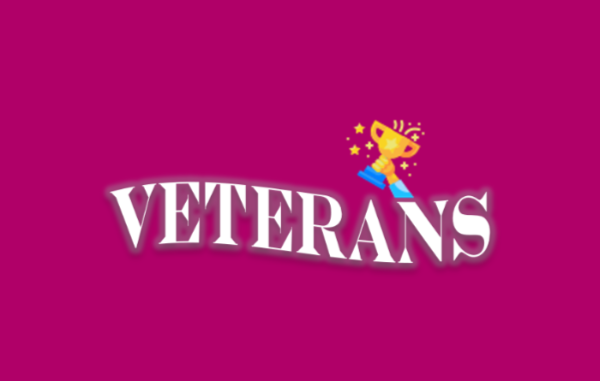<br>
<div align="center"><font size="2">Trophy icon from: https://icons8.com </font></div>

<a id="4.2."></a> <br>
## <div class="subsection_title">4.2. Proven skills pay off.</div>
## <div class="heading">Q6: For how many years have you been writing code and/or programming?</div><div class="heading">Q25: What is your current yearly compensation (approximate $USD)?</div>

In [ ]:
# Find the median salary for each data scientist
def find_median_salary(x):
    
    x = x.replace("$", "").replace(",", "").replace(">", "").split("-")
    
    if len(x) == 2:
        salaries = [int(x[0]), int(x[1]) + 1]
        median_salary = sum(salaries) / 2
    else:
        median_salary = int(x[0])
    
    return median_salary


# Import purchasing power index data
df_ppi = pd.read_excel("../input/comparison-of-worldwide-cost-of-living-2020/Comparison of worldwide cost of living.xlsx", sheet_name='Sheet1')

# Get necessary columns
questions = ["Q7", "Q9", "Q14", "Q16", "Q17", "Q18", "Q19", "Q24", "Q25", "Q27_A", 
             "Q31_A", "Q32_A", "Q34_A", "Q36_A", "Q38_A", "Q39", "Q40", "Q42"]
nec_columns = extract_columns(questions)

# Insert extra columns
extra_cols = ["Q6", "Q3", "Q4", "Q5", "Q15", "Q20", "Q21"]
for extra_col in range(len(extra_cols)):
    nec_columns.insert(extra_col, extra_cols[extra_col])

# Creata a new dataframe with necessary columns
df_salary = data[nec_columns]

# Remove "Currently not employed" rows
df_salary = df_salary[df_salary["Q5"] != "Currently not employed"]

# Find the median salary
df_salary["Median_Salary"] = df_salary["Q25"].apply(find_median_salary)
df_salary["Median_Salary"] = df_salary["Median_Salary"].astype("float32")

# Drop NaN salary rows
df_salary.dropna(subset=['Q25'], inplace=True)

# Remove countries that have no purchasing price index
to_drop = ['Peru', 'Argentina', 'Taiwan', 'Belarus', 'Uganda', 'Ethiopia', 'I do not wish to disclose my location', 'Other']
df_salary["Q3"] = df_salary["Q3"].apply(lambda x: x.strip())
df_salary = df_salary[~df_salary['Q3'].isin(to_drop)]

# Rename the column as "country" before the merge
df_salary = df_salary.rename(columns={"Q3": "country"})

# Merge df_salary with df_ppi
df_salary = df_salary.merge(df_ppi[["country", "purchasing_power_index"]], on='country', how='left')

# Calculate PPP adjusted salary
df_salary["PPI_Adj_Salary"] = (df_salary["Median_Salary"] / 100) * df_salary["purchasing_power_index"]

# Remove salary column
df_salary.drop("Q25", inplace=True, axis=1)

# Find relevant columns for further analysis
data_columns = df_salary.columns.to_list()
data_columns = data_columns[7:-3]

# Fill NaN values with 0, and non NaN values with 1
df_salary[data_columns] = df_salary[data_columns].notnull().astype('int')

# Calculate the sum of group columns
target_cols = ["Q7", "Q9", "Q14", "Q16", "Q17", "Q18", "Q19", "Q24", "Q27_A", "Q31_A", "Q32_A", "Q34_A", "Q36_A", "Q38_A", "Q39", "Q40", "Q42"]
skills = ["Programming Languages", "IDEs", "Visualization Libraries", "ML Frameworks", "ML Algorithms", "Computer Vision Methods", "NLP Methods",
         "Important Work Activities", "Cloud Computing Platforms", "Managed ML Products", "Big Data Products", "Business Intelligence Tools",
         "Automated ML Tools", "ML Experiments Tools", "Public Sharing Platforms", "Data Science Courses", "Favorite Media Sources"]
for i, target_col in enumerate(target_cols):
    group_cols = df_salary.columns[df_salary.columns.str.startswith(target_col)].to_list()
    df_salary[skills[i]] = df_salary[group_cols].sum(axis=1)
    
# Create the dataframes for graphs    
# 1st df
df_sal_analysis_1 = df_salary[["Q6", "Q4", "Q5", "Q15", "Q20", "Q21", "PPI_Adj_Salary"]]

# Rename some cell values
#1
old_degree_names = ["No formal education past high school", "Some college/university study without earning a bachelor’s degree"] 
new_degree_names = ["High school", "Incomplete college"]
df_sal_analysis_1['Q4'] = df_sal_analysis_1['Q4'].replace(old_degree_names, new_degree_names)
#2
new_com_size = ["0-49", "50-249", "250-999", "1000-9,999", "10,000+"]
df_sal_analysis_1['Q21'] = df_sal_analysis_1['Q21'].replace(com_size_categories, new_com_size)

# Sort
fedu_categories = ["High school", "Incomplete college", "Bachelor’s degree", "Master’s degree", 
                   "Doctoral degree", "Professional doctorate", "I prefer not to answer"]
df_sal_analysis_1['Q6'] = pd.Categorical(df_sal_analysis_1['Q6'], prex_categories)
df_sal_analysis_1['Q4'] = pd.Categorical(df_sal_analysis_1['Q4'], fedu_categories)
df_sal_analysis_1['Q15'] = pd.Categorical(df_sal_analysis_1['Q15'], mlex_categories)
df_sal_analysis_1['Q21'] = pd.Categorical(df_sal_analysis_1['Q21'], new_com_size)
df_sal_analysis_1.sort_values(["Q6", "Q4", "Q15", "Q21"], inplace=True)

# Rename columns
new_col_names = {"Q4": "Formal Education Degree", "Q5": "Current Role Title", "Q15": "ML Experience", "Q20": "Industry", "Q21": "Company Size"}
df_sal_analysis_1 = df_sal_analysis_1.rename(columns=new_col_names)

# 2nd df
analyzed_cols = df_salary.columns.to_list()[-18:]
analyzed_cols.insert(0, "Q6")
df_sal_analysis_2 = df_salary[analyzed_cols]

# Group by programming experience
df_sal_analysis_2 = df_sal_analysis_2.groupby("Q6").mean().reset_index().round(2)

# Sort
df_sal_analysis_2['Q6'] = pd.Categorical(df_sal_analysis_2['Q6'], prex_categories)
df_sal_analysis_2.sort_values("Q6", inplace=True)

# y axis values
y_feats = df_sal_analysis_2.columns.to_list()[2:]
y_feats_2 = df_sal_analysis_1.columns.to_list()[1:-1]
for i, item in enumerate(y_feats_2):
    y_feats.insert(i, item)
    
# Subplot title numeration by letters
letters = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v"]

# Plot
plt.style.use('seaborn-darkgrid')
f, ax = plt.subplots(nrows=11, ncols=2, figsize=(18,64))
title = "Fig.4.2.1 - Purchasing Power Index-Adjusted Monthly Salaries Depending on the \nProgramming Experience, Education, Role, Industry, Company Size and Skill Level"
plt.suptitle(title, fontsize=font_large+2, color=figure_title_color, ha="center", y=1)

# Axis parameters
def plot_data(this_ax, subplot_title, y_label, x, y, color, size):
    this_ax.scatter(x, y, s=size, c=color, cmap="cool", alpha=0.8, edgecolors="white", linewidth=2)
    this_ax.set_title(subplot_title, fontsize=font_medium, color=subplot_title_color, y=1.05)
    this_ax.tick_params(axis='x', which='major', labelsize=font_small, labelrotation=45)
    this_ax.set_xlabel('Programming Experience', fontsize=font_medium, labelpad=10)
    this_ax.set_ylabel(y_label, fontsize=font_medium, labelpad=10)
    return this_ax

# Plot data population
for i, y_feat in enumerate(y_feats):
    p_row = (i // 2)
    p_col = (i % 2)
    this_ax = ax[p_row, p_col]
    
    # First 5 plots
    if p_row * p_col < 2 and p_row + p_col < 3:
        df_for_bubble = df_sal_analysis_1[["Q6", y_feat, "PPI_Adj_Salary"]].groupby(["Q6", y_feat]).mean().reset_index().round(2)
        x = df_for_bubble["Q6"]
        y = df_for_bubble[y_feat]
        subplot_title = "(" + letters[i] + ")" + " Programming Experience and the \n " + y_feat
        color1 = df_for_bubble["PPI_Adj_Salary"]
        size1 = df_for_bubble["PPI_Adj_Salary"] / 100
        this_ax = plot_data(this_ax, subplot_title, y_feat, x, y, color1, size1)
        
    # Rest of the plots
    else:
        x = df_sal_analysis_2["Q6"]
        y = df_sal_analysis_2[y_feat]
        subplot_title = "(" + letters[i] + ")" + " Programming Experience and the \nUse of " + y_feat
        color2 = df_sal_analysis_2["PPI_Adj_Salary"]
        size2 = df_sal_analysis_2["PPI_Adj_Salary"] / 100
        y_label = "# of " + y_feat
        this_ax = plot_data(this_ax, subplot_title, y_label, x, y, color2, size2)
    
f.tight_layout(pad=2)

plt.show()

The great question is this: if the <span style="font-weight:bold; color:#B00068">veterans</span> are so skilled, do those skills pay off(6)? The short answer is Yes. Now, we will look into it, how(7).<br>
**4.2.1.** Throughout all the subplots, we will see that <u>coding experience is positively correlated with the salary level independent of any y-axis variable</u>. Especially, it becomes more prominent with three years or more of <i>programming experience</i>.<br>
**4.2.2.** It seems that the level of <i>formal education</i> has no direct impact on the salary (<i>graph-a</i>).<br>
**4.2.3.** For all levels of <i>programming experience</i>, <i>Developer Relations/Advocacy</i> and <i>Product Manager</i> roles generally pay more. For programmers experienced for more than five years, additional roles such as <i>Machine Learning Engineer</i>, <i>Data Scientist</i>, and <i>Data Engineer</i> can give more pay. (<i>graph-b</i>).<br>
**4.2.4.** Another high-paying experience type is <i>machine learning</i>. Even if a data scientist is not a <span style="font-weight:bold; color:#B00068">veteran</span> coder, he can earn a higher salary, becoming a <i>machine learning veteran</i>. Interestingly, the effect on salaries of the more <i>machine learning experience</i> for <span style="font-weight:bold; color:#B00068">veterans</span> is not so strong as the other <i>programming experience</i> levels. This issue may stem from that the <span style="font-weight:bold; color:#B00068">veterans</span>, as the subplots reveal, earn more due to <i>coding experience</i>, so the <i>machine learning experience</i> as extra might be doing relatively less contribution to their salaries. An alternative explanation may be like this: As we will see in the next finding, one can reach financial nirvana faster in <i>machine learning</i> than in <i>programming</i>. Therefore, if a <span style="font-weight:bold; color:#B00068">veteran</span> who does some <i>machine learning</i> performs a job role defined as a <i>programmer</i> rather than a <i>machine learning engineer</i>, his compensation may match the dominant role. Of course, we need further proofs of these explanations (<i>graph-c</i>).<br>
**4.2.5.** The <i>machine learning</i> experience has a higher salary growth potential than the <i>programming experience</i> (<i>graph-c</i>).<br>
**4.2.6.** Industry factor presents some implications too. <i>Non-profit/Service</i> pays lower, an intuitively expected result (<i>graph-d</i>).<br>
**4.2.7.** <i>Military/Security/Defense</i> and <i>Insurance/Risk Assessment</i> are high payers across most <i>coding experience</i> levels (<i>graph-d</i>).<br>
**4.2.8.** <i>Medical/Pharmaceutical</i>, <i>Hospitality/Entertainment/Sports</i>, and <i>Accounting/Finance</i> are among the highest payers for five years or more of <i>programming experience</i> (<i>graph-d</i>).<br>
**4.2.9.** <i>Broadcasting/Communications</i> pursues a very consistent compensation policy. The more experienced a kaggler is, the more he earns in this industry. Salary size is proportional to the <i>programming experience</i> years (<i>graph-d</i>).<br>
**4.2.10.** The general tendency with the <i>Company Size</i> is that the larger the company is, the more it pays (<i>graph-e</i>).<br><br>
The following subplot y-axis parameters are about the number of applications for each skill(8).<br>
**4.2.11.** We witness two main trends in all subplots from f through v. The first one is, as the level of experience increases, so <u>generally</u> does the number of products, tools, or platforms known and used, which is a result that we have already discovered in the <b>Findings</b> section. Especially there is a direct positive linear relationship between <i>programming experience</i> and the use of any of <i>programming languages</i>, <i>IDEs</i>, <i>machine learning algorithms</i>, <i>cloud computing platforms</i>, and <i>big data products</i> (<i>graph-f through v</i>).<br>
**4.2.12.** The second trend is, up to the 3-5 years threshold, the number of products, tools, or platforms known and used doesn't impact the salary level. Only when the <i>programming</i> or <i>machine learning experience</i> exceeds three years, salaries steadily get larger. In other words, one should have more than three years of <i>programming</i> or <i>machine learning experience</i> to expect remarkable increases in his compensation (<i>graph-f through v</i>).<br>
**4.2.13.** In several subplots, we see that more experienced data scientists in <i>coding</i> (especially <span style="font-weight:bold; color:#B00068">veterans</span>) may use fewer products than the less experienced data scientists in <i>programming</i>.  However, still, the former group earns more than the latter one. Seniority certainly pays more, but seniority is also proof of established skills (<i>graphs h, i, k, l, m, o, q, r, s, t, u, v</i>).<br>
**4.2.14.** Based on the findings of <b>4.2</b>, we may draw a <i>honey and milk combination</i> like this:  a double <span style="font-weight:bold; color:#B00068">veteran</span> in <i>programming</i> and <i>machine learning</i>, working for a <i>big company</i> in one of <i>Military/Security/Defense</i>, <i>Insurance/Risk Assessment</i>, <i>Medical/Pharmaceutical</i>, <i>Hospitality/Entertainment/Sports</i>, or <i>Accounting/Finance</i> businesses, and having one of the <i>Product Manager</i>, <i>Machine Learning Engineer</i>, <i>Developer Relations/Advocacy</i>, <i>Data Scientist</i>, or <i>Data Engineer</i> roles.<br><br><br>

### **<span style="font-weight:bold; color:#B00068">“Anyone who stops learning is old, whether at twenty or eighty. Anyone who keeps learning stays young.”</span>**

#### Henry Ford
<br>
<br>

<a id="b"></a> <br>
# <div class="section_title">5. Notes</div>

(1) Survey response statistics are classified as follows: <b>True #</b> represents the total number of answers that don't involve "<i>NaN</i>" or "<i>None</i>." <b>False #</b> represents the total number of replies that <i>only</i> include "<i>NaN</i>" or "<i>None</i>" responses.  <b>All #</b> gives the total number of <b>True</b> and <b>False</b> answers for each <span style="font-weight:bold; color:#778899">selected group</span>. <b>True %</b> is the true response rate, which is found by dividing <b>True #</b> by <b>All #</b>. <b>Total True #</b> is the sum of <b>True #</b> counts of <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span>. <b>Total False #</b> is the sum of <b>False #</b> counts of both groups.<br> 
(2) For obvious reasons, in this calculation, I had to remove the answers designated as <i>Other</i> or <i>I do not wish to disclose my location</i>.<br> 
(3) Percentages do not add up to one as the respondents can select more than one choice. This way, we can also compare the skill versatility levels of the <span style="font-weight:bold; color:#B00068">veterans</span> and <span style="font-weight:bold; color:#626EFA">novices</span>.<br>
(4) To avoid wordiness and confusion, I had to develop little terminology here. The term <i>large company</i> denotes companies with 10,000 or more employees. <i>Larger companies</i> indicate companies that have more than 999 employees. Companies with 0-49 employees are <i>small companies</i>.<br>
(5) Polar graphs used the <b>Novice True %</b> and <b>Veterans True %</b> as data. The calculation method of these statistics is described in (1). For example, if 52% of the <span style="font-weight:bold; color:#B00068">veterans</span> selected <u>at least one</u> tool, product, or platform on any question included in the polar graph data, then the <span style="font-weight:bold; color:#B00068">veterans</span>' skill grade on that topic would be plotted on the graph as 52.<br>
(6) Purchasing power in each country is different, so I had to adjust the salaries. But there can be various indices out there to accomplish this task. The index[22] I have found doesn't involve some countries included in the survey. These are Peru, Argentina, Taiwan, Belarus, Uganda, and Ethiopia. I had to remove these countries in calculating the purchasing power index-adjusted salaries and plotting the related graphs, otherwise, the calculation wouldn't have been standard across all countries as I would use different indices together. Still, this shouldn't affect the general results. Alternatively, a safer approach for the reader could be to interpret the results for the included countries only.<br>
A second issue, I also eliminated the responses given as <i>I do not wish to disclose my location</i> or <i>Other</i> as I cannot identify the particular country.<br>
(7) I used the programming experience as the x-axis variable. To see the salary trend better, I took all levels of coding experience. y-axis variables are the questions and topics we have seen in the <b>Findings</b> section. The size of the bubbles gives the relative magnitudes of the adjusted salaries.<br> 
(8) I calculated the related y-axis parameter as the mean number of products, tools, or platforms known in each skill department by the respondents in each category of programming experience. For example, the mean number of IDEs known and used by the respondents of 3-5 years programming experience.<br>  

<a id="c"></a> <br>  
# <div class="section_title">6. Sources</div>

[1] 2020. Enthusiast to Data Professional - What changes? Retrieved from Kaggle:https://www.kaggle.com/spitfire2nd/enthusiast-to-data-professional-what-changes<br>
[2] 2021, October 14. State of Machine Learning and Data Science 2021, Kaggle.<br>
[3] 2021, November 9. Population, total. Retrieved from The World Bank: https://data.worldbank.org/indicator/SP.POP.TOTL<br>
[4] 2021, November 9. IS_608/NanosatDB_munging/Countries-Continents.csv. Retrieved from The GitHub: https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv<br>
[5] 2021, June 16. Coming soon: AWS launching new Region in Spain by mid-2022. Retrieved from AWS Public Sector Blog: https://aws.amazon.com/blogs/publicsector/coming-soon-aws-launching-new-region-spain-2022/<br>
[6] 2019, October 28. Germany: New Immigration Acts to Attract and Retain Skilled Workers Published. Retrieved from Library of Congress: https://www.loc.gov/item/global-legal-monitor/2019-10-28/germany-new-immigration-acts-to-attract-and-retain-skilled-workers-published/<br>
[7] 2019, May 09. German government defends planned immigration laws. Retrieved from DW: https://www.dw.com/en/german-government-defends-planned-immigration-laws/a-48676952<br>
[8] 2020, June 25. Foreign Worker Visas Are the Tech Industry’s Dirty Secret. Retrieved from Foreign Policy: https://foreignpolicy.com/2020/06/25/foreign-workers-visas-suspended-trump-tech-industry/<br>
[9] 2019. A story told through a heatmap. Retrieved from Kaggle: https://www.kaggle.com/tkubacka/a-story-told-through-a-heatmap<br>
[10] 2020, November 4. Programming language Python's popularity: Ahead of Java for first time but still trailing C. Retrieved from ZDNet: https://www.zdnet.com/article/programming-language-pythons-popularity-ahead-of-java-for-first-time-but-still-trailing-c/<br>
[11] 2021, November 11. Project Jupyter. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Project_Jupyter<br>
[12] 2021, November 11. Visual Studio Code. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Visual_Studio_Code<br>
[13] 2021, November 11. Project Jupyter. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Project_Jupyter<br>
[14] 2021, October 24. PyCharm. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/PyCharm<br>
[15] 2021, October 27. Notepad++. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Notepad%2B%2B<br>
[16] 2021, November 10. Microsoft Visual Studio. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Microsoft_Visual_Studio<br>
[17] 2021, October 20. Vim (text editor). Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Vim_(text_editor)<br> 
[18] 2021, October 22. Emacs. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Emacs<br>
[19] 2021, October 25. Matplotlib. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/Matplotlib<br>
[20] 2021, November 12. D3.js. Retrieved from The Wikipedia: https://en.wikipedia.org/wiki/D3.js<br>
[21] 2021, November 19. Cloud infrastructure services vendor market share worldwide from 4th quarter 2017 to 3rd quarter 2021. Retrieved from Statista: https://www.statista.com/statistics/967365/worldwide-cloud-infrastructure-services-market-share-vendor/<br>
[22] 2021, November 16. Comparison of worldwide cost of living. Retrieved from WorldData.info: https://www.worlddata.info/cost-of-living.php<br>